#  GIVEN THE PROBLEM STATEMENT WE HAVE TO RECCOMEND THE PRODUCTS TO THE USERS. 
### WE HAVE CONSIDERD FEATURES AS PRODUCT IDENTIFICCATION NUMBER,BRAND OF THE PRODUCT, COLOR OF THE PRODUCT,URL OF THE PRODUCT AND TYPE OF THE PRODUCT,TITLE OF THE PRODUCT.

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1bfPl952PuXX5HUXI4qwAWetBGTJqfil_' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1bfPl952PuXX5HUXI4qwAWetBGTJqfil_


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('28k_apparel_data')  


In [74]:
#import all the necessary packages.

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [0]:
data=pd.read_pickle('28k_apparel_data')

In [0]:
print(data.head())

          asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
11  B001LOUGE4                 Fitness Etc.              Black   
15  B003BSRPB0                  FeatherLite              White   
21  B014ICEDNA                        FNC7C             Purple   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
11  https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
21  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26  
6   Wome

In [0]:
print(data.shape)

(28385, 7)


In [0]:
data=data.drop('formatted_price',axis=1)
data

asin                        brand              color  \
4       B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6       B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
11      B001LOUGE4                 Fitness Etc.              Black   
15      B003BSRPB0                  FeatherLite              White   
21      B014ICEDNA                        FNC7C             Purple   
27      B014ICEJ1Q                        FNC7C             Purple   
43      B0079BMKDS                  FeatherLite              White   
46      B01NACPBG2                 Fifth Degree              Black   
50      B00480IRZS                FineBrandShop              Green   
60      B014ICB9A0                        FNC7C              Black   
78      B011YPK0MW               Feel The Piece               Navy   
82      B003BTPVGA                  FeatherLite       Pacific Blue   
89      B01MQD3261                     FARYSAYS           Burgandy   
95      B0079QXJ3S                FineBrandShop            Fuchsia   
96      B01NH5DUH1                   Fjällräven          Night Sky   
99      B0079BM3A8                  FeatherLite                Red   
107     B00R7DO9ZA                       Finejo              white   
112     B00480IS52                FineBrandShop              White   
118     B073RV3H1L                   Fjallraven      Alpine Purple   
119     B00BXOQ3X0                  FeatherLite        Coffee Bean   
121     B011JQWCCM                      Ferrari                Red   
133     B01NAZ3L3C                 Fifth Degree              Black   
138     B01I5GRO18               FIFTEEN TWENTY           Eggshell   
139     B002ZZT446          Florida Hat Company             Purple   
147     B015K88D78         Fire-Dog-Custom Tees               Pink   
156     B07453B7L3                        Fever              Coral   
167     B003BSQ0WU                  FeatherLite                Red   
169     B003BSPZ5I                  FeatherLite              Green   
172     B0079BM2EA                  FeatherLite                Red   
177     B0172HUQ7A                       Felina        black/white   
...            ...                          ...                ...   
182994  B010AMAMLY                   HP-LEISURE              Black   
182999  B01N6U4HBM                    TOOGOO(R)                Red   
183009  B0759DZSK6                       Theory               Pink   
183015  B013OD2ZF2                    SODIAL(R)            Leopard   
183018  B0758G2WFJ          Two by Vince Camuto               Blue   
183020  B01G3K4HGS              Vintage America               Blue   
183028  B07537MXMN                       Zeagoo         Pale Green   
183029  B071DKC11G                 Foxcroft NYC              White   
183045  B0105E9U2Y                    SODIAL(R)              Green   
183046  B00I2LM57K                      Hippies              White   
183052  B0758J5239                  Yoga Trendz       Multicolored   
183055  B06X9TXWSY                  Free People              Ivory   
183062  B0753JRH77                susana monaco           Merangue   
183071  B0721MX9G5       Lauren by Ralph Lauren             Purple   
183075  B01NAWEGYO                    TOOGOO(R)               Blue   
183078  B06XQ19P9G                   G by GUESS         Light Wash   
183080  B074FFY1NP                  Free People              Multi   
183081  B01MRV2IFS                      YueLian              Black   
183092  B01LY4QWLF              Vintage America              White   
183096  B07167SCNH             Tart Collections              Black   
183101  B07575N2WX                      Soprano               Gray   
183103  B06XBHLW8H                    SODIAL(R)              Green   
183107  B072J7CCWR                        Reiss        Ballet Pink   
183108  B06WLNR267                     Shawhuaa               Rosy   
183109  B010R8I8NA                  GreaterGood          Turquoise   
183110  B073YGRLSM      

***taking the required features for the analysis***
*as a part of data preprocessing we remove the duplicates

In [0]:
print(sum(data.duplicated('title')))

2325


In [0]:
#to see the duplicated data in dataframe
#we use .duplicated function to obtain the dupkicates

In [0]:
#actually we want the data of title column  greater than 4 only
#so we want to store the title of length greater than 4
#and we store it in same column

In [0]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title']]

In [0]:
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
11  B001LOUGE4                 Fitness Etc.              Black   
15  B003BSRPB0                  FeatherLite              White   
21  B014ICEDNA                        FNC7C             Purple   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
11  https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
21  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title  
4   Featherlite Ladies' Long Sleeve Stain Resistan...  
6   Women's Unique 100% Cotton T - Special Olympic...  
11             Ladies Cotton Tank 2x1 Ribbed Tank Top  
15  FeatherLite Ladies' Moisture Free Mesh Sport S...  
21  Supernatural Chibis Sam Dean And Castiel Short...

In [0]:
datasorted=data[data['title'].apply(lambda x: len(x.split())>4)]

In [0]:
#.map is the function which takes data column and iterate through it and returnd dataframe
#.filter is the function if the any condition is present

In [0]:
print(data.shape)

(28385, 6)


In [0]:
# shape is the function which is used regularly
data.sort_values('title')

asin                  brand                     color  \
118987  B008D30AGK  Out+of+Print+Clothing              Multicolored   
78827   B003IDE8XQ      Maggie's Organics                      Grey   
109599  B00KI3VDXM            Crazy4Bling                    Purple   
40451   B073SKNQHD   The Workout Princess      Premium Heather Gray   
12050   B06WRW8RQ1                     AJ                     Black   
10679   B06WP94NLG                     AJ                     Black   
6052    B06VXNH8P5                     AJ                     White   
100164  B007X684BQ  Out of Print Clothing       Pride and Prejudice   
147798  B007X684C0  Out of Print Clothing                      Grey   
55008   B00UNS5KW2               Brickels                   Picture   
162044  B071WM3C88        & Other Stories                      Blue   
117208  B01ES27Y3G             S' MAXMARA          Ultramarine/Navy   
136062  B01E7L8L6W             S' MAXMARA                     Black   
111495  B01H28M1PY             S' MAXMARA                Beige/Sand   
106708  B0749RT32T                MaxMara             Midnight Blue   
114289  B06XH5QF22                MaxMara       Wine-colored Violet   
83029   B06XH61DZ2                MaxMara               Ultramarine   
135921  B0749SNF8V                MaxMara             Midnight Blue   
164114  B00KN2Y2W2                  COOGI                   Cayenne   
145191  B00KN2X2PA                  COOGI                     White   
75526   B00KN2XQ06                  COOGI                     White   
70689   B00UUEQ8AC            GLJ TRADING             B318 SD_BLACK   
105741  B00UUEQC6M            GLJ TRADING             B318 SD_BLACK   
163728  B013PQVXN8            GLJ TRADING                     Black   
111309  B013PQW396            GLJ TRADING                     Mocha   
106504  B013PQW6CK            GLJ TRADING                     Mocha   
127007  B013PQW50S            GLJ TRADING                     Mocha   
135593  B013PQVV7G            GLJ TRADING                     Black   
111282  B00OL0HMWY            GLJ TRADING                      Navy   
3613    B01DCZ32D6                AMA(TM)                     White   
...            ...                    ...                       ...   
92382   B007TVCG3W               Tokidoki                    Yellow   
167267  B007TVCWEU               Tokidoki                     White   
94413   B007TVCVVO               Tokidoki                     White   
139484  B007TVCWO0               Tokidoki                     White   
8424    B06X6KCJ6Z                     AJ                     Black   
120006  B01LZGDZZT              Vanberfia                      8720   
39370   B01N2YYP4H           Vihaan Impex                      Grey   
56982   B01IKRKKJU           Vihaan Impex                      Pink   
60603   B01F4U0ROO               virblatt                Terracotta   
40331   B071JRW7BN             wallpapHER                     Black   
44082   B01MPYKVER            White Horse                 Turquoise   
171318  B01I80YZNG       heather trujillo                      Grey   
135865  B01I7ZZYE6       heather trujillo                     White   
22273   B074741CW9            White Horse                     Black   
61206   B073TW3NP3                    mkl                     Green   
177229  B0756RHHHV                   Have  Mustard Yellow and Black   
59030   B071VKWKLV            Xhilaration           Bubble Gum Pink   
60078   B0722WJ5H3            Xhilaration           Bubble Gum Pink   
18905   B0711JTVXY            Xhilaration           Purple/Raccoons   
74338   B00X9Z53FU               xiaoming                      Blue   
95954   B00WPK4T4G               xiaoming                 red+whtie   
138588  B00X5MLMRA               xiaoming                    Yellow   
103647  B00WPJHEE4               xiaoming                    Yellow   
76209   B014GZY5KK               xiaoming              Figure Color   
152506  B00WOB0LHK               xiaom

In [0]:
indices=[]
for i,row in data.iterrows():
    indices.append(i)
import itertools
dedupe=[]
i=0
j=0
numberofdatapoint=data.shape[0]
while i<numberofdatapoint and j<numberofdatapoint:
    previousi=i
    a=data['title'].loc[indices[i]].split()
    j=i+1
    while j < numberofdatapoint:
        b=data['title'].loc[indices[j]].split()
        length=max(len(a),len(b))
        count=0
        for k in itertools.zip_longest(a,b):
            if(k[0]==k[1]):
                count+=1
        if(length-count)>2:
            dedupe.append(data['asin'].loc[indices[i]])
            if j==numberofdatapoint-1:
                if j ==numberofdatapoint-1: dedupe.append(data['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previousi == i:
        break
            
        

In [0]:
data=data.loc[data['asin'].isin(dedupe)]

In [0]:
print(data.head())

          asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
11  B001LOUGE4                 Fitness Etc.              Black   
15  B003BSRPB0                  FeatherLite              White   
21  B014ICEDNA                        FNC7C             Purple   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
11  https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
21  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title  
4   Featherlite Ladies' Long Sleeve Stain Resistan...  
6   Women's Unique 100% Cotton T - Speci

In [0]:
#we want to remove stopwords
#we dont have list of all words to remove all srop words
#we have to iterate through each column of data
# and remove the stopwords
#for that we write a function
def preprocessing(text,index,column):
    if type(text) is not int:
        string=""
        for words in text.split():
            word=("".join(e for e in words if e.isalnum()))
            word=word.lower()
            if word not in stop:
                string=string+word+" "
                data[column][index]=string

In [0]:
print(data.shape)

(28329, 6)


In [0]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [0]:
#text preprocessing
#important step in text preprocessing is to remove duplicates
#and removing stopwords

import nltk
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))


In [0]:
#important thiong is we have to remove text in the recieved text
#for that we have to write using .isalnum() function
#we are writing it in comprehension
#we are making it as string 


In [0]:
for index,row in data.iterrows():
    preprocessing(row['title'],index,'title')
#if we use iterrows function it takes more time complexity
#it is better to use apply method in which we can use functionname inside
#data=data['title'].apply(preprocessing)
#but apply method is only taking a integer

In [0]:
#iterrows() is the function is very useful to iterate through the columns
#for index,row in data.iterrows()
#we can specify the data column needed to be changed using row['dataframe']
#we can pass to function with column name specified

In [0]:
# actually we are building the models on using the bag of words and tfidf
# we will use then the distance parameter to obtain the similarity
#in this we gomnna use multiple utililty functions
# to plot he image and confusion matrix

In [0]:
import re
from collections import Counter

In [0]:
import requests
from PIL import Image
from io import BytesIO


**code for plotting the heatmap**
* these are basically the utility functions we write for diplay the values 
*we also write the utility functions to show the product
* we have written display function to visualise the product
*we have written plotheatmap function to see the values of bow or tfidf etc..,

In [0]:
from matplotlib import gridspec
def plotheatmap(keys,values,labels,url,text):
    gs=gridspec.GridSpec(2,2,width_ratios=[4,1],height_ratios=[4,1])
    fig=plt.figure(figsize=(25,3))
    ax=plt.subplot(gs[0])
    ax=sns.heatmap(np.array([values]),annot=np.array([labels]))
    ax.set_xticklabels(keys)
    ax.set_title(text)
    ax=plt.subplot(gs[1])
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display(url,ax,fig)
    plt.show()
    

In [0]:
def display(url,ax,fig):
    response=requests.get(url)
    img=Image.open(BytesIO(response.content))
    plt.imshow(img)

In [0]:
def plotheatmapimage(indexoftitle,inputvector,outputvector,urlofreccomend,textofreccomend,modeltype):
    intersection=set(inputvector.keys())&set(outputvector.keys())
    for i in outputvector:
        if i not in intersection:
            outputvector[i]=0
    keys=list(outputvector.keys())
    values=[outputvector[x] for x in outputvector.keys()]
    if modeltype=='bagofwords':
        labels=values
    elif modeltype == 'tfidf':
        labels = []
        for x in outputvector.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf.vocabulary_:
                labels.append(outingfeatures[indexoftitle, tfidf.vocabulary_[x]])
            else:
                labels.append(0)
    elif modeltype == 'idf':
        labels = []
        for x in outputvector.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idftitlevectorizer.vocabulary_:
                labels.append(idf_title_features[indexoftitle, idftitlevectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    plotheatmap(keys, values, labels, urlofreccomend, textofreccomend)

In [0]:
def texttovector(text):
    word=re.compile(r'\w+')
    words=word.findall(text)
    return Counter(words)

In [0]:
def getresult(indextitle,contenta,contentb,url,model):
    text1=contenta
    text2=contentb
    inputvector=texttovector(text1)
    outputvector=texttovector(text2)
    plotheatmapimage(indextitle,inputvector,outputvector,url,text2,model)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
outfeatures=vect.fit_transform(data['title'])
outfeatures.get_shape()
#actually we are buliding the model based on the bag of words
#later we also build the models using theidf tfidf extra


(28329, 13872)

In [0]:
#why we use bag of words ?
#we can also predict the outputs using the bag of words
#we can use the same thing to predict the outpuits for reccomendation 
#systems.but how it uses bag of words?
#here comes the pair wise distances we calculate
#we calculate the pairwise distances and we take 
#consider which distances are less
#we use this distances and predict the products

In [0]:
from sklearn.metrics import pairwise_distances
import numpy as np
def bagofwordsmodel(idofproduct,numberofsimilarproducts):
    #now we want the products of smaller distances 
    #of our product which are similar
    pairwisedist=pairwise_distances(outfeatures,outfeatures[idofproduct])
    #it will store the pairwise distances of our product with every other 
    #product remaining
    #i need indices imean product ids of sorted products which are similar
    #when we wnat indices we use argsort
    #we need few actually which are similar that is specified
    #we need flatten which we need to make array proper
    similarindices=np.argsort(pairwisedist.flatten())[0:numberofsimilarproducts]
    #if we want store smaller distances
    smalldistproducts=np.sort(pairwisedist)[0:numberofsimilarproducts]
    dataindices=list(data.index[similarindices])
    print(similarindices)
    print(dataindices)
    
bagofwordsmodel(200,10)

[   79    43   200   297    11   387   374 28262   386   314]
[449, 244, 1121, 1747, 82, 2214, 2160, 182738, 2213, 1841]


In [0]:
data.index[79]

449

In [0]:
data[79:80]

asin        brand         color  \
449  B003BTPVEM  FeatherLite  Pacific Blue   

                                      medium_image_url product_type_name  \
449  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                 title  
449  featherlite ladies long sleeve stain resistant...

In [0]:
#here comes most important thing why are we using index
#during the manipulation of data we have removed
#various rows of data
#so we are finding at data which is presenting now at that
#particular indices postion

In [0]:
from sklearn.metrics import pairwise_distances
import numpy as np
def bagofwordsmodelnew(idofqueryproduct,numberofsimilarproducts):
    pairwisedisty=pairwise_distances(outfeatures,outfeatures[idofqueryproduct])
    similarindices=np.argsort(pairwisedisty.flatten())[0:numberofsimilarproducts]
    smalldist=np.sort(pairwisedisty.flatten())[0:numberofsimilarproducts]
    dataindices=list(data.index[similarindices])
    for i in range(0,len(dataindices)):
        getresult(indices[i],data['title'].loc[dataindices[0]], data['title'].loc[dataindices[i]], data['medium_image_url'].loc[dataindices[i]], 'bagofwords')
        print('ASIN:',data['asin'].loc[dataindices[i]])
        print('brand',data['brand'].loc[dataindices[i]])
        print('title',data['title'].loc[dataindices[i]])
        print('euclideandistance',smalldist[i])

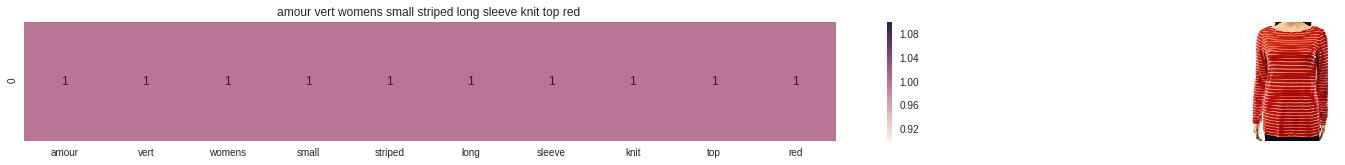

ASIN: B07233VPMN
brand Amour Vert
title amour vert womens small striped long sleeve knit top red 
euclideandistance 0.0


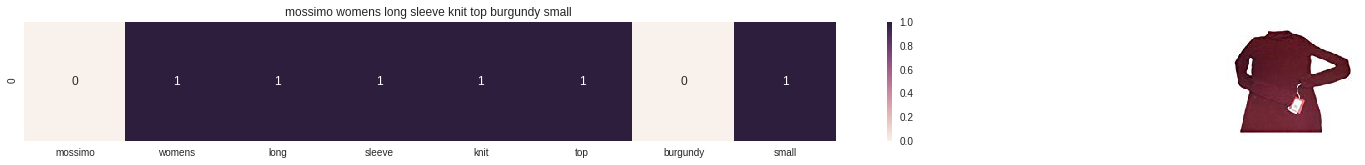

ASIN: B07263HM77
brand Mossimo
title mossimo womens long sleeve knit top burgundy small 
euclideandistance 2.449489742783178


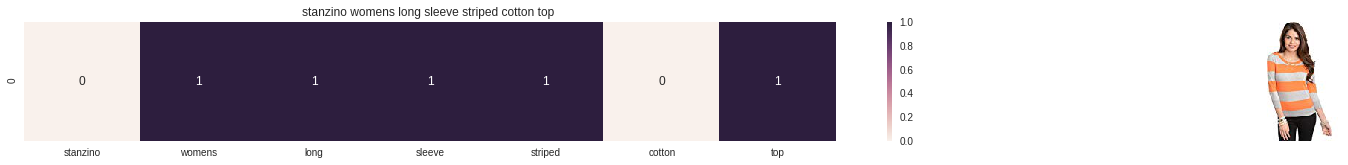

ASIN: B00IMNJGIY
brand Stanzino
title stanzino womens long sleeve striped cotton top 
euclideandistance 2.6457513110645907


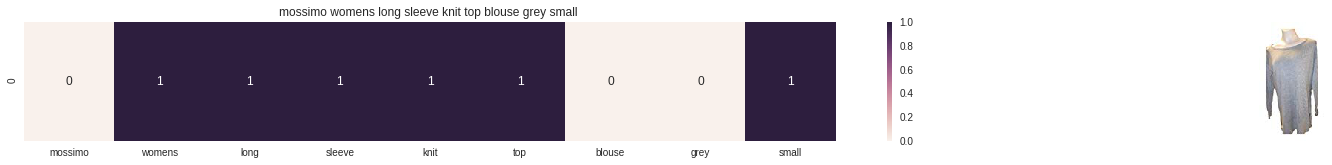

ASIN: B071LTQV1R
brand Mossimo
title mossimo womens long sleeve knit top blouse grey small 
euclideandistance 2.6457513110645907


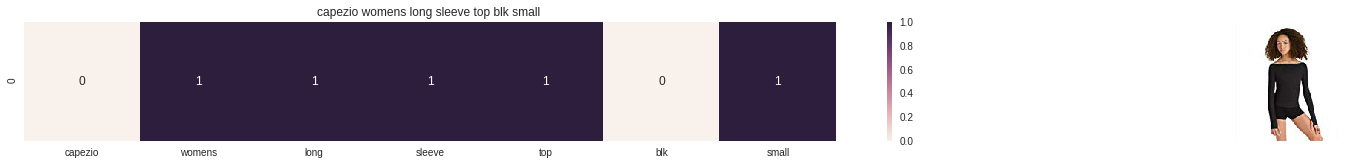

ASIN: B01G4HRW8K
brand Capezio
title capezio womens long sleeve top blk small 
euclideandistance 2.6457513110645907


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
bagofwordsmodelnew(500,5)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
outingfeatures=tfidf.fit_transform(data['title'])


In [0]:
def tfidfmodel(idofrequiredproduct,numberofsimilarproducts):
    pairwisedis=pairwise_distances(outingfeatures,outingfeatures[idofrequiredproduct])
    indicesofproduct=np.argsort(pairwisedis.flatten())[0:numberofsimilarproducts]
    neardistances=np.sort(pairwisedis.flatten())[0:numberofsimilarproducts]
    dataframeindices=list(data.index[indicesofproduct])
    for i in range(0,len(indicesofproduct)):
        getresult(indicesofproduct[i],data['title'].loc[dataframeindices[0]], data['title'].loc[dataframeindices[i]], data['medium_image_url'].loc[dataframeindices[i]], 'tfidf')
        print('ASIN:',data['asin'].loc[dataframeindices[i]])
        print('brand',data['brand'].loc[dataframeindices[i]])
        print('title',data['title'].loc[dataframeindices[i]])
        print('euclideandistance',neardistances[i])

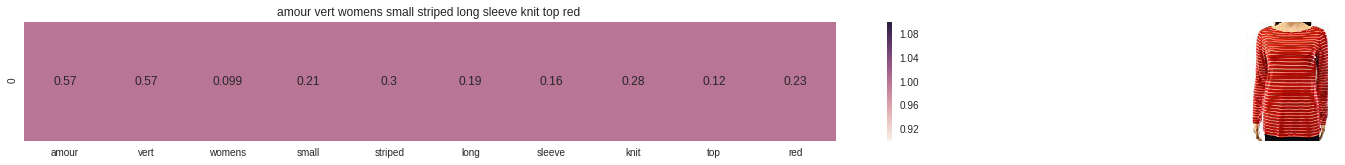

ASIN: B07233VPMN
brand Amour Vert
title amour vert womens small striped long sleeve knit top red 
euclideandistance 0.0


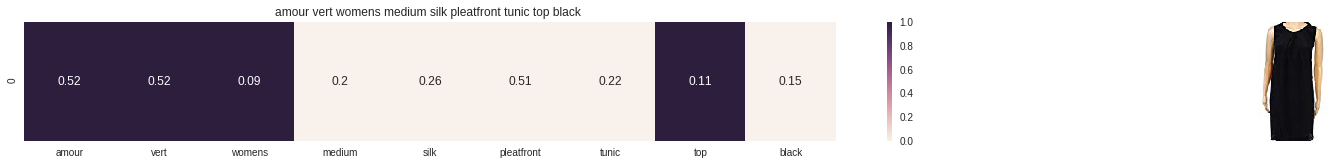

ASIN: B073LF8M8S
brand Amour Vert
title amour vert womens medium silk pleatfront tunic top black 
euclideandistance 0.8791979622416723


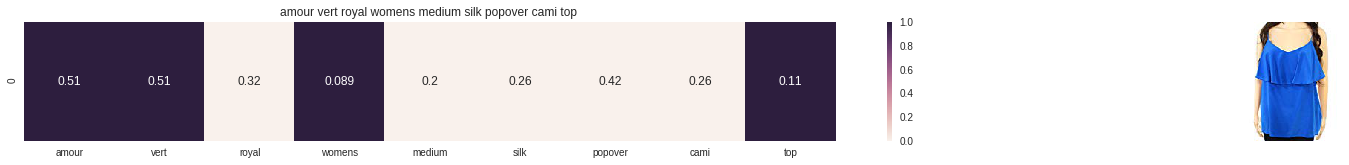

ASIN: B0758W2F83
brand Amour Vert
title amour vert royal womens medium silk popover cami top 
euclideandistance 0.8885558352135935


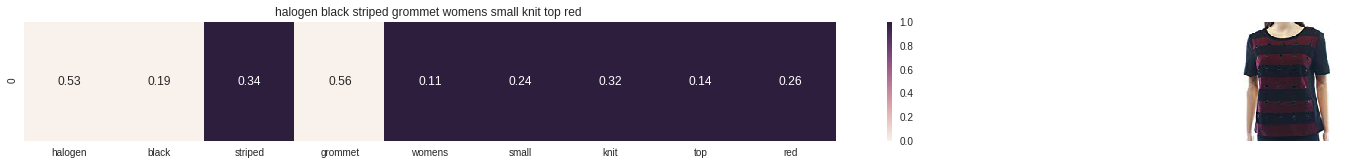

ASIN: B0711YCRGK
brand Halogen
title halogen black striped grommet womens small knit top red 
euclideandistance 1.1602887312339172


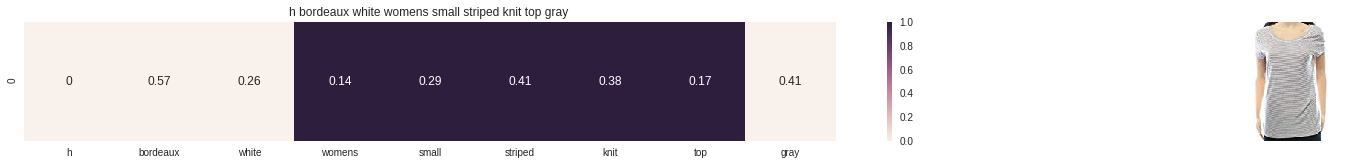

ASIN: B01MYEW2TZ
brand H By Bordeaux
title h bordeaux white womens small striped knit top gray 
euclideandistance 1.1642279422822785


In [0]:
tfidfmodel(500,5)

***in scikit learn there is no inbuilt way of calculating inverse document frequency***
writing a function to find the inverse document frequency of a word.
inverse document frequency is logarithmic ratio  of
total number of words in document
 to the 
number of occurences particular word in documents

In [0]:
def n_containing(word):
  count=0
  for w in data['title']:
    w=w.lower()
    for wor in w.split(' '):
      
      if str(word)==str(wor):
       
        count+=1
     
  return count

In [0]:

def idf(word):
   
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

In [0]:
print(data['title'])

4         featherlite ladies long sleeve stain resistant...
6         womens unique 100 cotton  special olympics wor...
11                  ladies cotton tank 2x1 ribbed tank top 
15        featherlite ladies moisture free mesh sport sh...
21        supernatural chibis sam dean castiel short sle...
27        supernatural chibis sam dean castiel neck tshi...
43          featherlite ladies silky smooth pique white xl 
46        fifth degree womens gold foil graphic tees jun...
50        ladies green seamless ribbed diamond patterned...
60        supernatural chibis sam dean castiel neck shir...
78               feel piece sami dip dye top one size navy 
82        featherlite ladies long sleeve stain resistant...
89        farysays womens sexy cutout shoulder blouse la...
95         ladies fuchsia pink seamless stone set tube top 
96        fjallraven  womens high coast flannel shirt lo...
99            featherlite ladies silky smooth pique red 3x 
107       finejo ladies sleeveless shirt

In [0]:
idftitlevectorizer=CountVectorizer()
idf_title_features=idftitlevectorizer.fit_transform(data['title'])
idf_title_features.get_shape()

(28329, 13872)

In [0]:
print(idftitlevectorizer.vocabulary_)

{'featherlite': 5049, 'ladies': 7153, 'long': 7511, 'sleeve': 11145, 'stain': 11510, 'resistant': 10073, 'tapered': 11965, 'twill': 12737, 'shirt': 10791, '2xl': 507, 'onyx': 8881, 'black': 2374, 'stone': 11584, 'womens': 13495, 'unique': 12836, '100': 47, 'cotton': 3859, 'special': 11383, 'olympics': 8858, 'world': 13530, 'games': 5523, '2015': 277, 'white': 13298, 'size': 11041, 'tank': 11935, '2x1': 503, 'ribbed': 10130, 'top': 12328, 'moisture': 8267, 'free': 5369, 'mesh': 8056, 'sport': 11441, 'xxxlarge': 13678, 'supernatural': 11743, 'chibis': 3406, 'sam': 10445, 'dean': 4180, 'castiel': 3211, 'short': 10917, 'shirts': 10865, 'lady': 7155, 'purple': 9761, 'neck': 8571, 'tshirts': 12638, 'female': 5068, 'silky': 10987, 'smooth': 11233, 'pique': 9365, 'xl': 13610, 'fifth': 5115, 'degree': 4216, 'gold': 5694, 'foil': 5281, 'graphic': 5768, 'tees': 12058, 'junior': 6841, 'printed': 9635, 'green': 5796, 'seamless': 10595, 'diamond': 4309, 'patterned': 9130, 'cap': 3136, 'wide': 13394,

In [0]:
# we need to convert the values into float
import math
idf_title_features  = idf_title_features.astype(np.float)

for i in idftitlevectorizer.vocabulary_.keys():
    # for every word in whole corpus we will find its idf value
  
    idf_val = idf(i)
    
    # to calculate idf_title_features we need to replace the count values with the idf values of the word
    # idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0] will return all documents in which the word i present
    for j in idf_title_features[:, idftitlevectorizer.vocabulary_[i]].nonzero()[0]:
        
        # we replace the count values of word i in document j with  idf_value of word i 
        # idf_title_features[doc_id, index_of_word_in_courpus] = idf value of word
        idf_title_features[j,idftitlevectorizer.vocabulary_[i]] = idf_val
        

In [0]:
def idf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        getresult(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'idf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from the given image :', pdists[i])
        print('='*125)


# in the output heat map each value represents the idf values of the label word, the color represents the intersection with inputs title

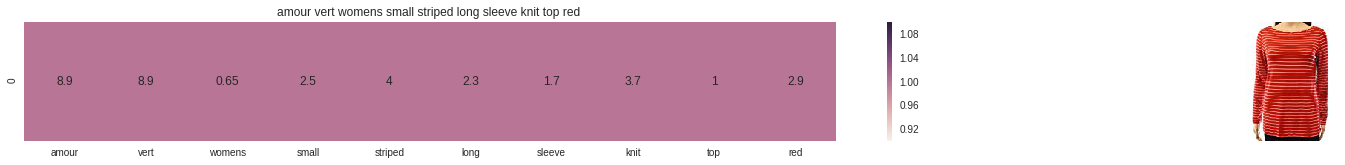

ASIN : B07233VPMN
Brand : Amour Vert
euclidean distance from the given image : 0.0


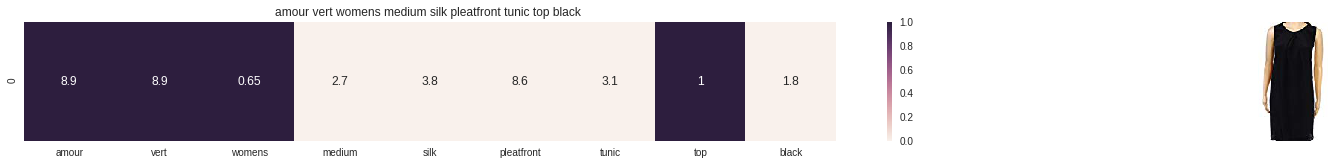

ASIN : B073LF8M8S
Brand : Amour Vert
euclidean distance from the given image : 12.761500403781588


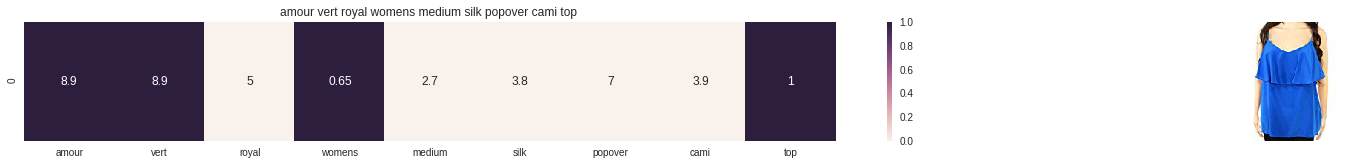

ASIN : B0758W2F83
Brand : Amour Vert
euclidean distance from the given image : 12.845532030512123


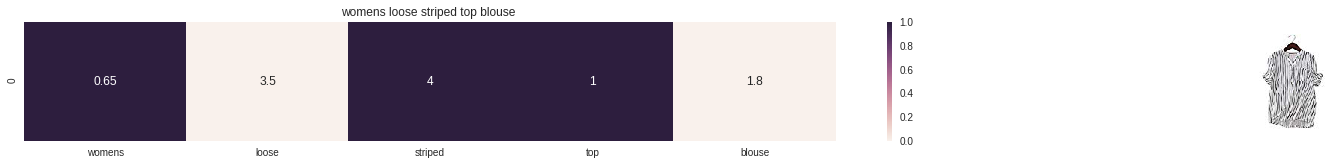

ASIN : B00ZZMYBRG
Brand : HP-LEISURE
euclidean distance from the given image : 14.477887327403735


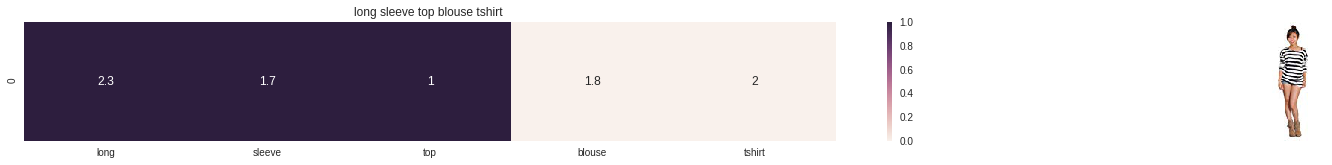

ASIN : B00KF2N5PU
Brand : Vietsbay
euclidean distance from the given image : 14.48558101673179


In [0]:
idf_model(500,5)

observartions:
*if u see th image at the first is our query image
*we want to find the image similar to it to reccomend we are usinf the idf(inverse document frequenncy for it)
*since idf is not readily avaialble in scikit learn we are writing seperate function for idf
*the main observation is the all tops are having checks ion them
*even if they are not of similar color the design on the dress  is same and the feabric looks similar





# USING THE AVERAGE WORD2VECTOR AND IDF WEIGHTED WORD2VEC MODEL TO RECCOMEND THE PRODUCTS

#till now we have dealt with the count vectorizer, tfidf vectorizer, idf vrctorizder  ***now we gonna deal with word2vec and average word2vedc***

### UTITLITY FUNCTIONS THAT ARE WRITTEN 
* TO GET THE DISTANCE
* GENERATE THE WORD2VECTOR FOR WHOLE SENTENCE
* DESIGNING THE HEAT MAP

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=0BwNkduBnePt2MEtLczFBUFJHSDg' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

0BwNkduBnePt2MEtLczFBUFJHSDg


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('word2vec_model')  


In [0]:
import pickle
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)


In [0]:
# Utility functions

def get_word_vec(sentence, doc_id, m_name):
    # sentence : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idftitlevectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idftitlevectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)


def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentence2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentence1.split())
    # set title as recommended apparels title
    ax.set_title(sentence2)
    
    ax = plt.subplot(gs[1])
    # we remove all grids and axis labels for image
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url, ax, fig)
    
    plt.show()

In [0]:
# vocab = stores all the words that are there in google w2v model
# vocab = model.wv.vocab.keys() # if you are using Google word2Vec

vocab = model.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idftitlevectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idftitlevectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

### [9.2] Average Word2Vec product similarity.

In [0]:
doc_id = 0
w2v_title = []
# for every title we build a avg vector representation
for i in data['title']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1

# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)


In [0]:
doc_id = 0
w2v_title = []
# for every title we build a avg vector representation
for i in data['title']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1

# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)


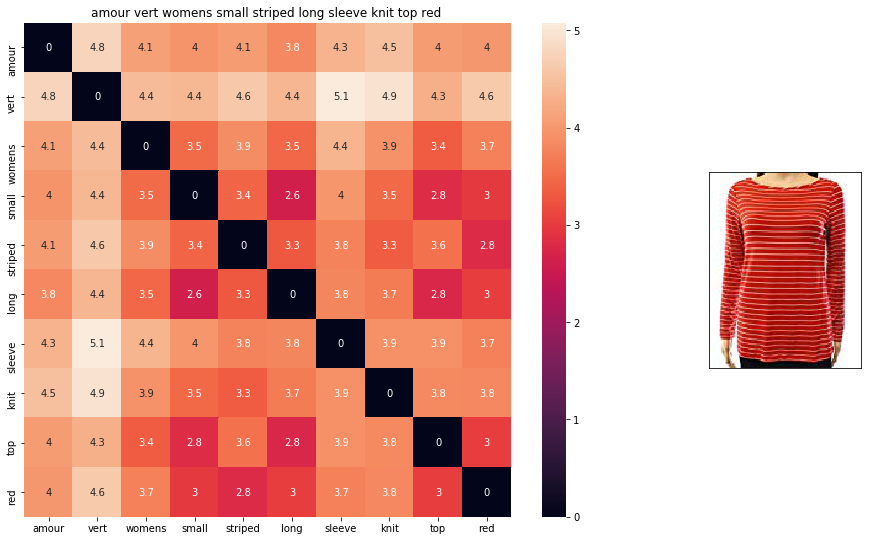

ASIN : B07233VPMN
BRAND : Amour Vert
euclidean distance from given input image : 0.0


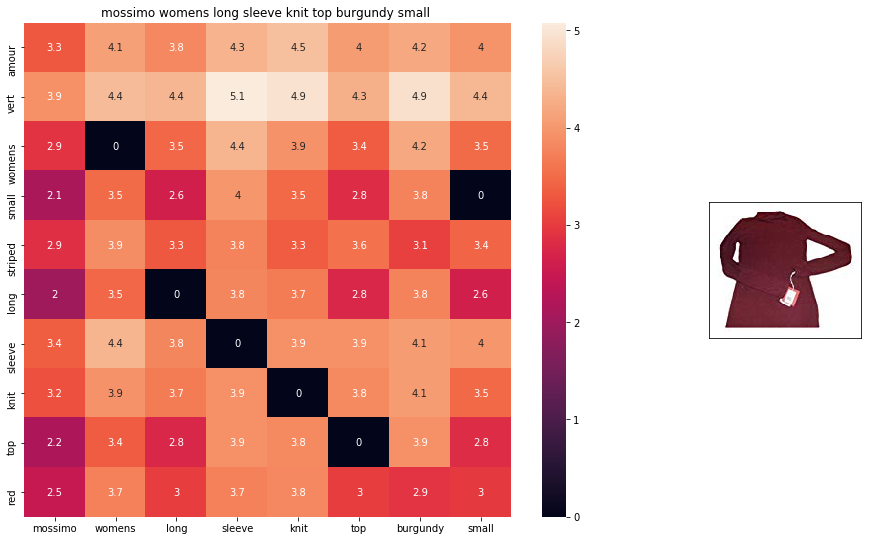

ASIN : B07263HM77
BRAND : Mossimo
euclidean distance from given input image : 0.64474595


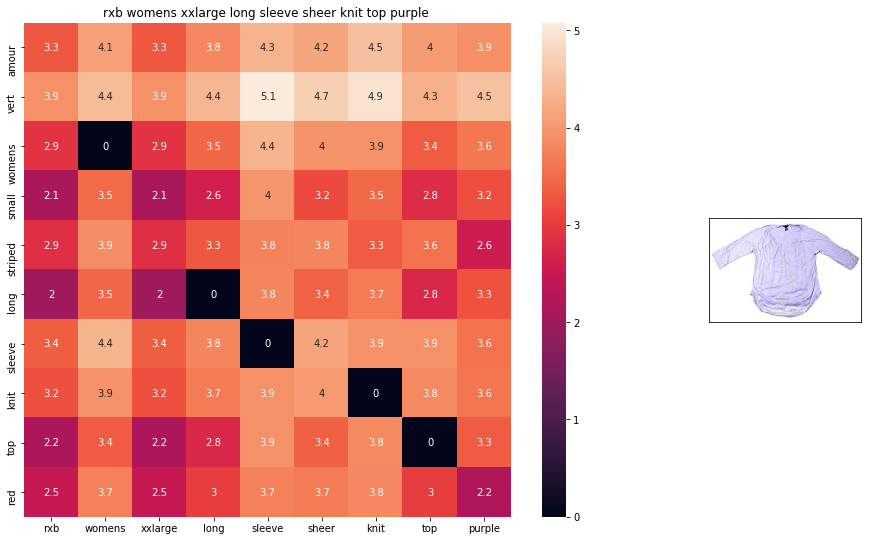

ASIN : B071DB6RKX
BRAND : RXB
euclidean distance from given input image : 0.687485


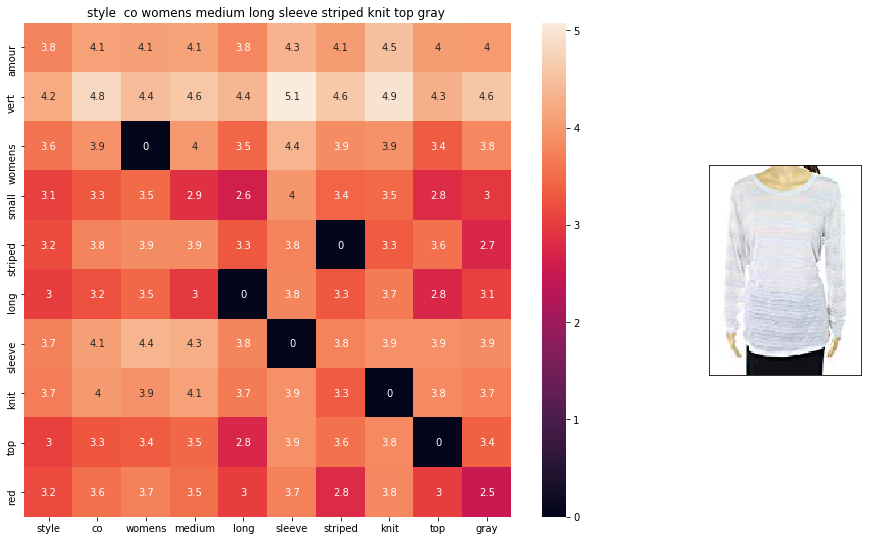

ASIN : B071G85TRM
BRAND : Style & Co.
euclidean distance from given input image : 0.6896328


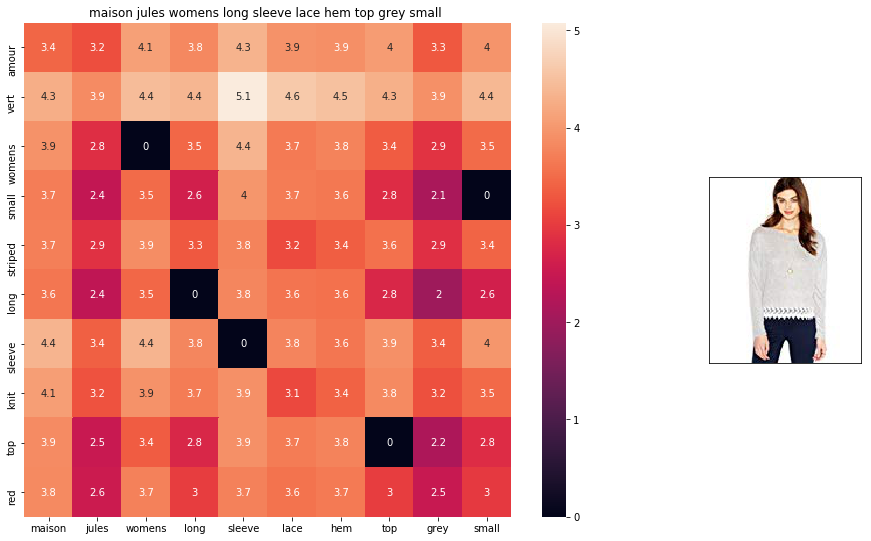

ASIN : B01LW3QDFV
BRAND : Maison Jules
euclidean distance from given input image : 0.69143736


In [0]:
def avg_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from given input image :', pdists[i])
        print('='*125)

        
avg_w2v_model(500,5)
# in the give heat map, each cell contains the euclidean distance between words i, j

##OBTAINING THE WEIGHTED WORD2VECTOR  FOR THE SENTENCES IN THE TITLE OF THE PRODUCT.

In [0]:
productid1=0
word2vectitle1=[]
for i in data['title']:
    word2vectitle1.append(getwordvec(i,300,productid1,'weighted'))
    
    productid1+=1
word2vectitle1=np.array(word2vectitle1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


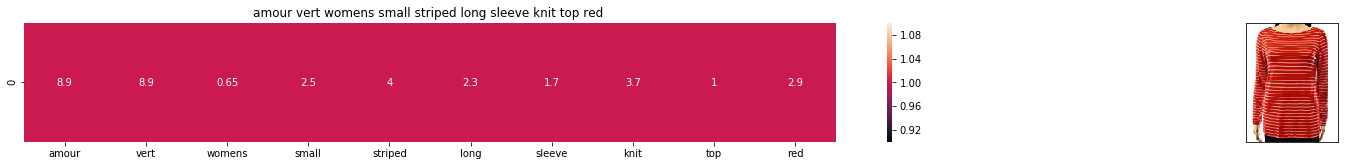

ASIN : B07233VPMN
Brand : Amour Vert
euclidean distance from the given image : 0.0


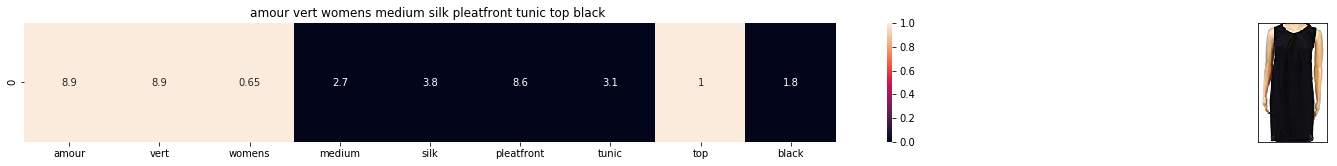

ASIN : B073LF8M8S
Brand : Amour Vert
euclidean distance from the given image : 12.761500403781588


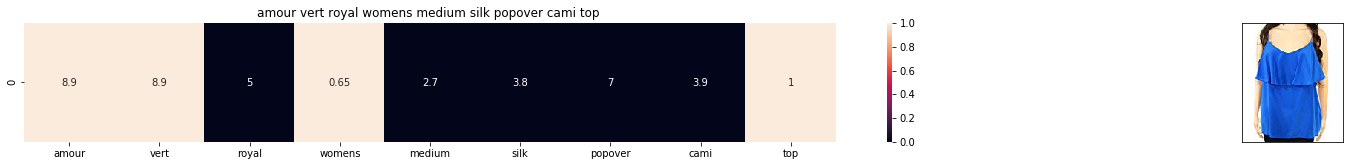

ASIN : B0758W2F83
Brand : Amour Vert
euclidean distance from the given image : 12.845532030512123


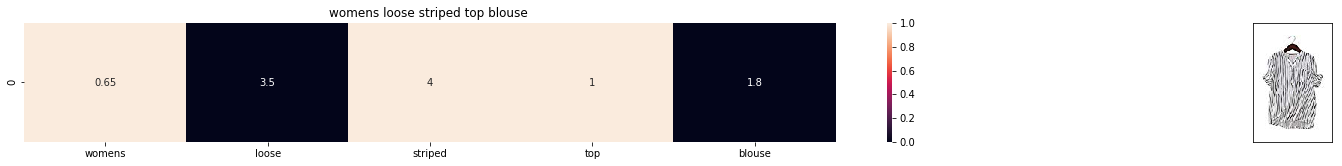

ASIN : B00ZZMYBRG
Brand : HP-LEISURE
euclidean distance from the given image : 14.477887327403735


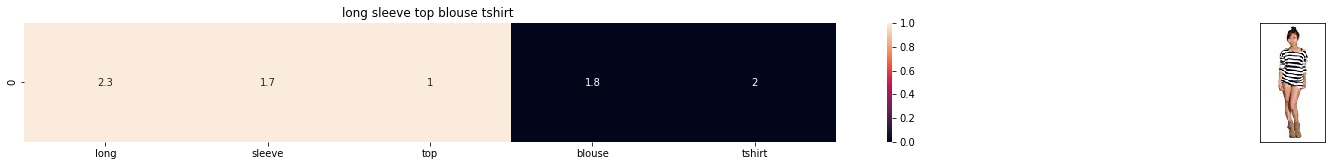

ASIN : B00KF2N5PU
Brand : Vietsbay
euclidean distance from the given image : 14.48558101673179


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
def weightedword2vecmodel(productid1,numberofresults):
    pairwisedistance=pairwise_distances(word2vectitle1,word2vectitle1[productid1].reshape(-1,1))
    indices=np.argsort(pairwisedistance.flatten())[0:numberofresults]
    pairwisedistances=np.sort(pairwisedist.flatten())[0:numberofresults]
    dataframeindices=list(data.index[indices])
    for i in range(0,len(dataframeindices)):
        heatmapw2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'weighted')
        print('ASIN',data['title'].loc[dataframeindices[i]])
        print('Brand',data['brand'].loc[dataframeindices[i]])
weightedword2vecmodel(500,5)     

In [0]:
doc_id = 0
w2v_title_weight = []
# for every title we build a weighted vector representation
for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1
# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title_weight = np.array(w2v_title_weight)

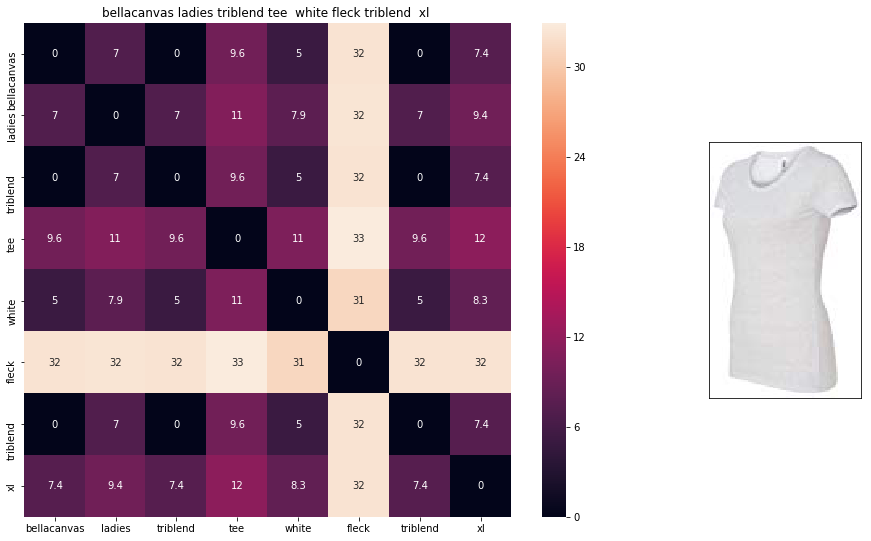

ASIN : B00EZFEA1Q
Brand : Bodek And Rhodes
euclidean distance from input : 0.0033829117


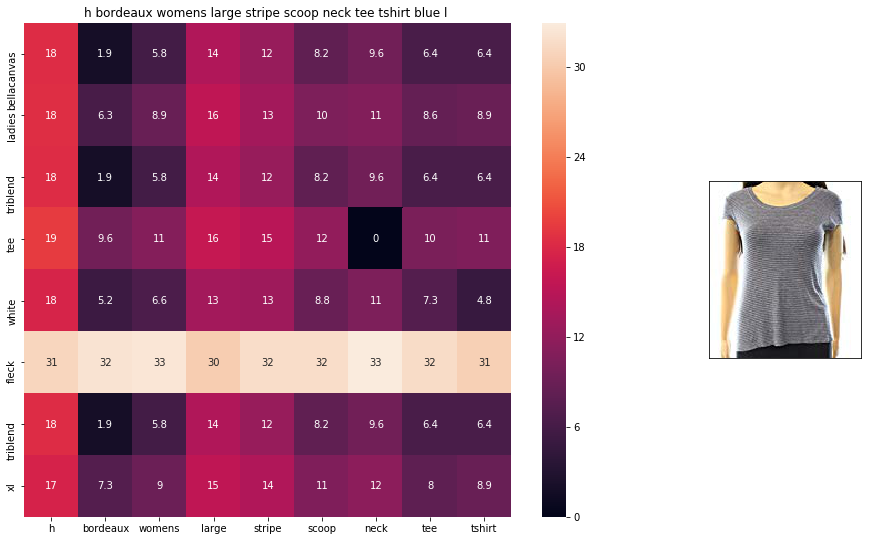

ASIN : B072LTMQN8
Brand : H By Bordeaux
euclidean distance from input : 3.746442


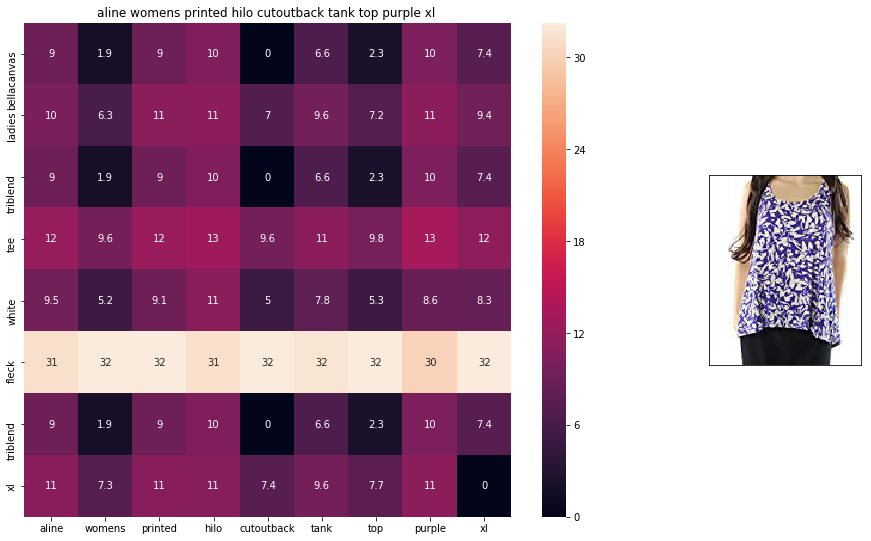

ASIN : B073S7LKV4
Brand : a_line
euclidean distance from input : 3.9673


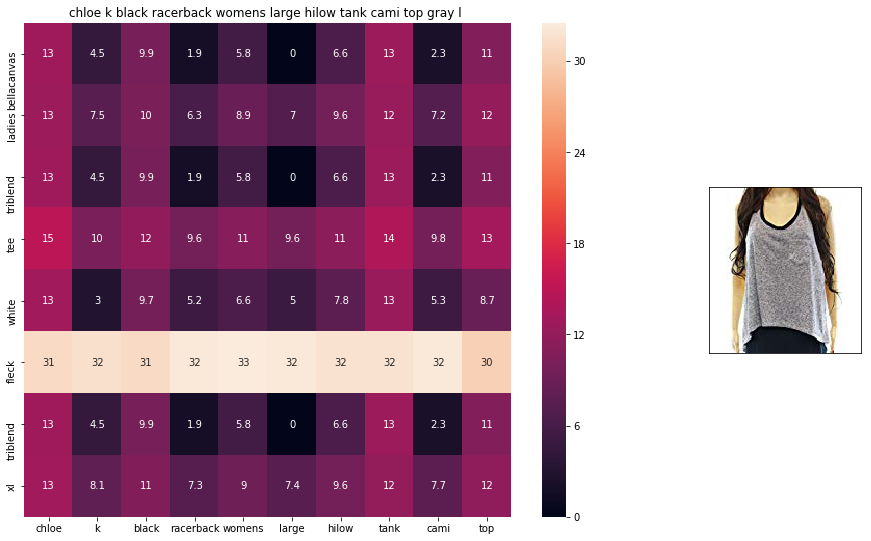

ASIN : B074WC7YSX
Brand : Chloe K.
euclidean distance from input : 3.9680202


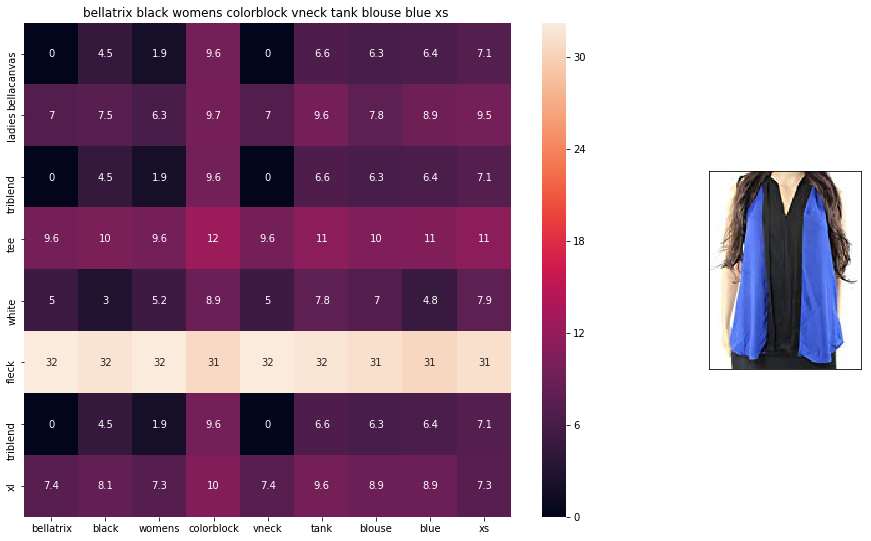

ASIN : B072C7VLB9
Brand : bellatrix
euclidean distance from input : 3.9842052


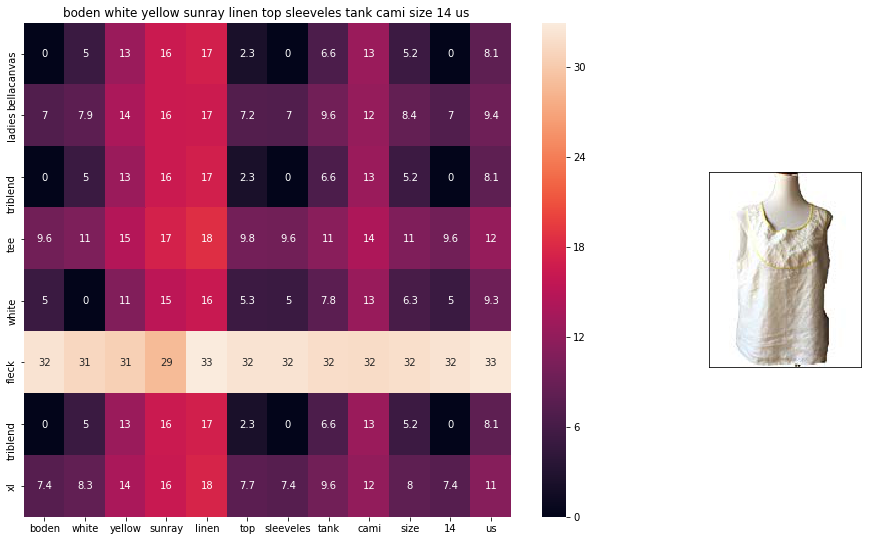

ASIN : B0718WSRLL
Brand : BODEN
euclidean distance from input : 3.9923296


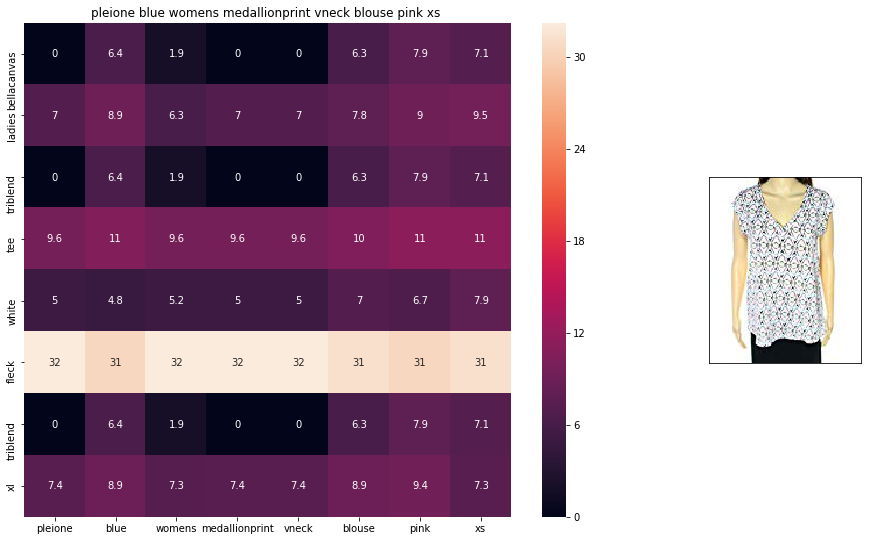

ASIN : B074VCV167
Brand : Pleione
euclidean distance from input : 4.000845


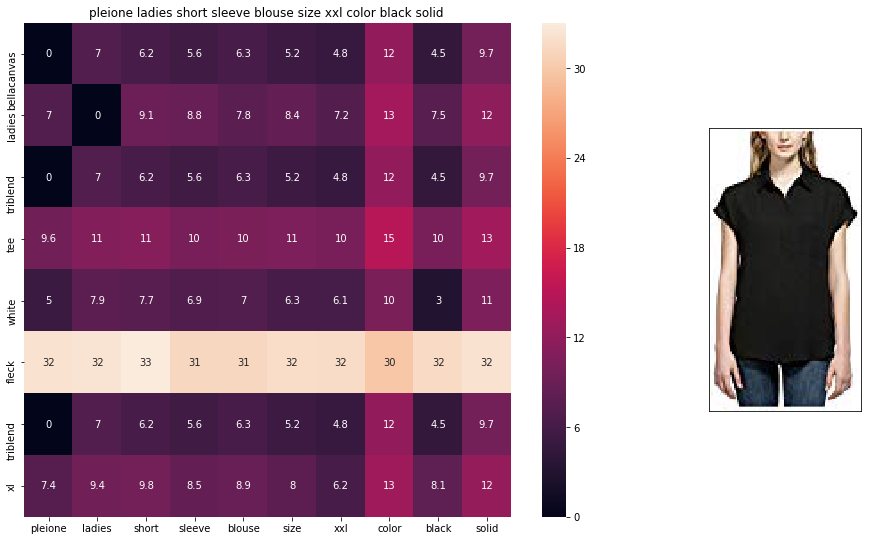

ASIN : B073RJTBVT
Brand : Pleione
euclidean distance from input : 4.0033755


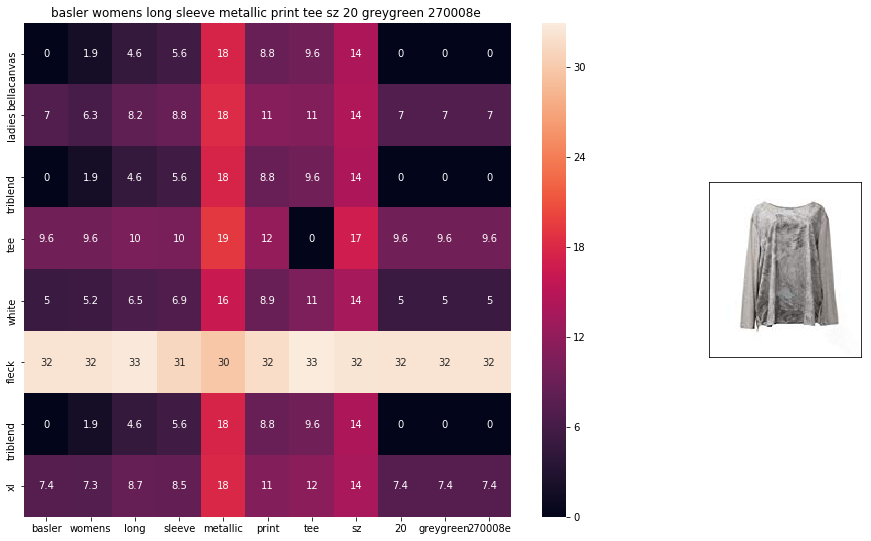

ASIN : B0741TQS32
Brand : Basler
euclidean distance from input : 4.0071883


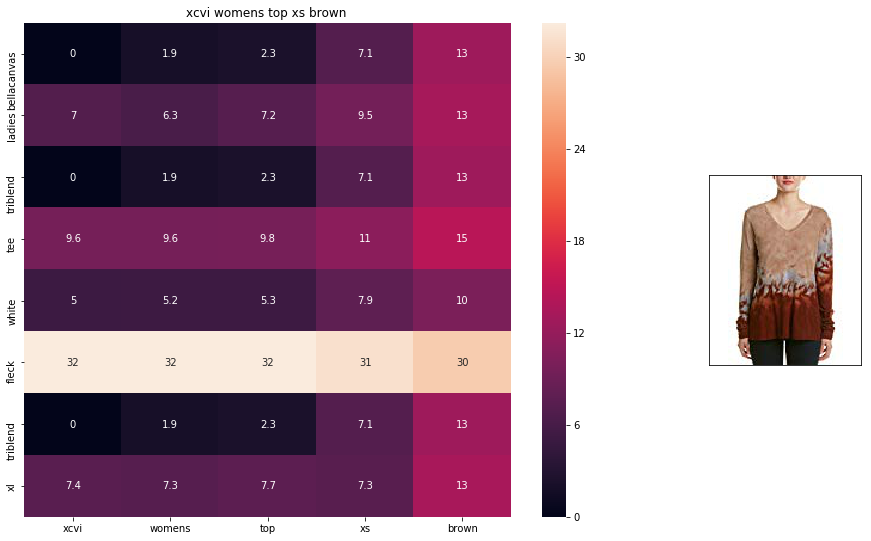

ASIN : B01N7V7SIG
Brand : XCVI
euclidean distance from input : 4.007199


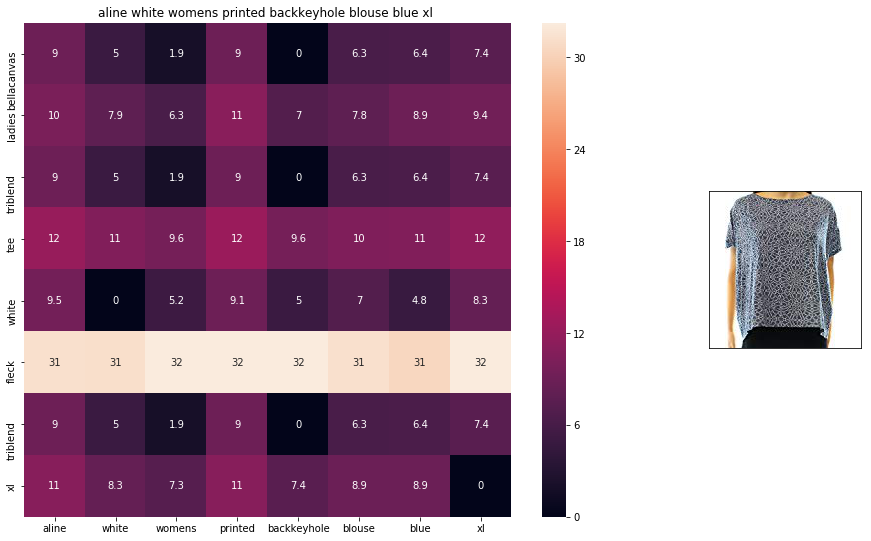

ASIN : B073S7PCGH
Brand : a_line
euclidean distance from input : 4.0099225


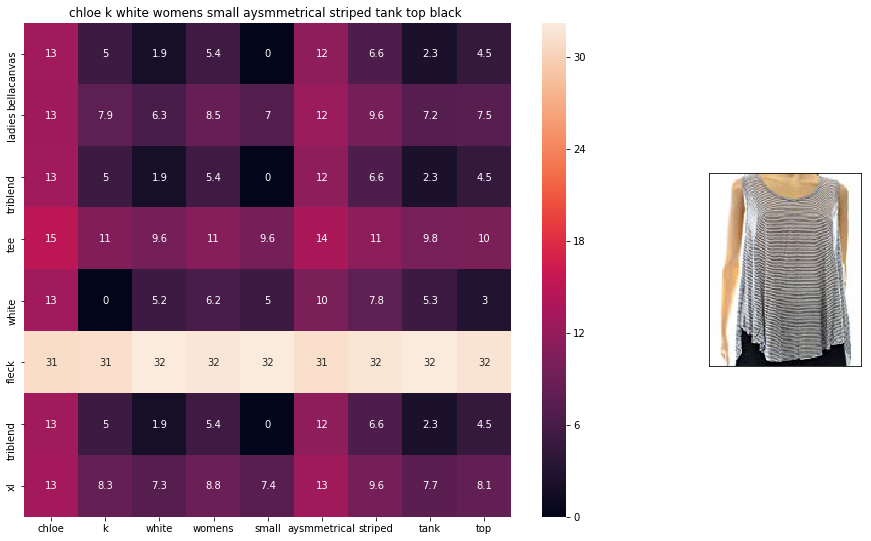

ASIN : B071SFVRZ9
Brand : Chloe K.
euclidean distance from input : 4.0121603


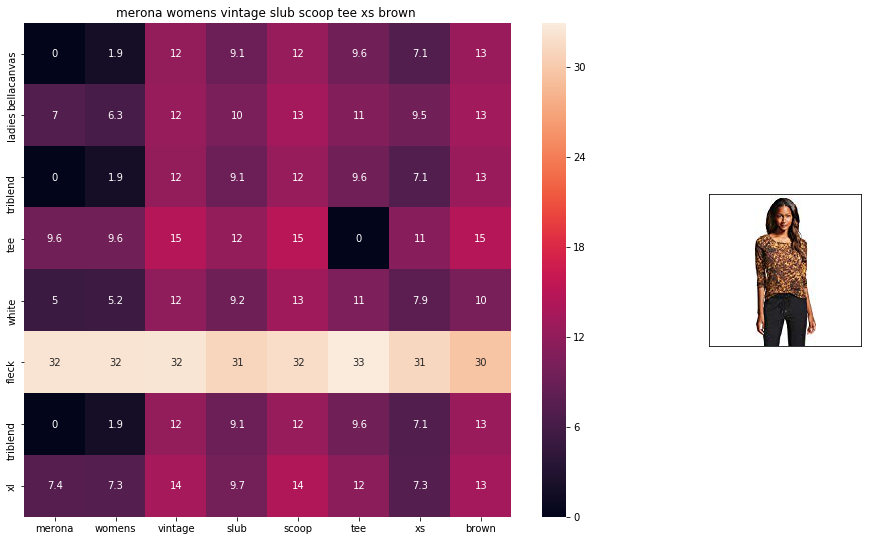

ASIN : B01M5KO072
Brand : Merona
euclidean distance from input : 4.0139318


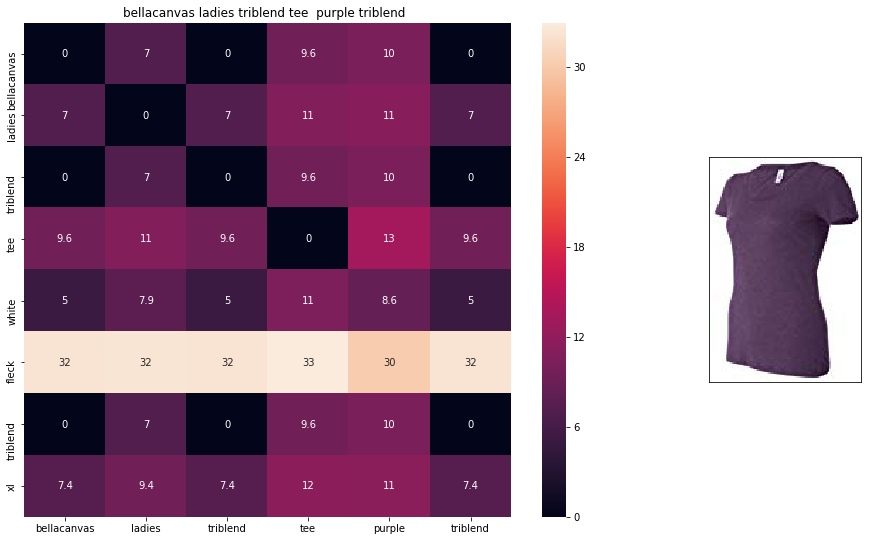

ASIN : B007P88J6W
Brand : Bodek And Rhodes
euclidean distance from input : 4.015648


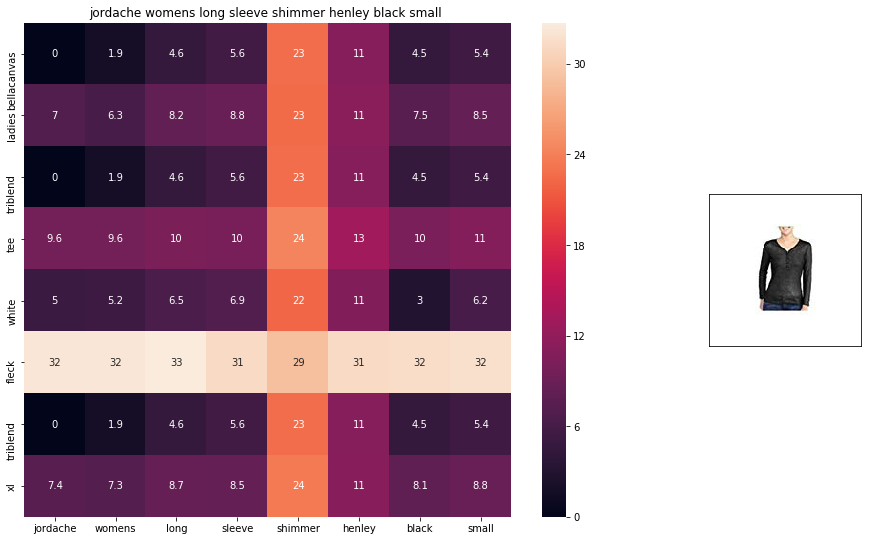

ASIN : B06ZYXHWSG
Brand : Jordache
euclidean distance from input : 4.018656


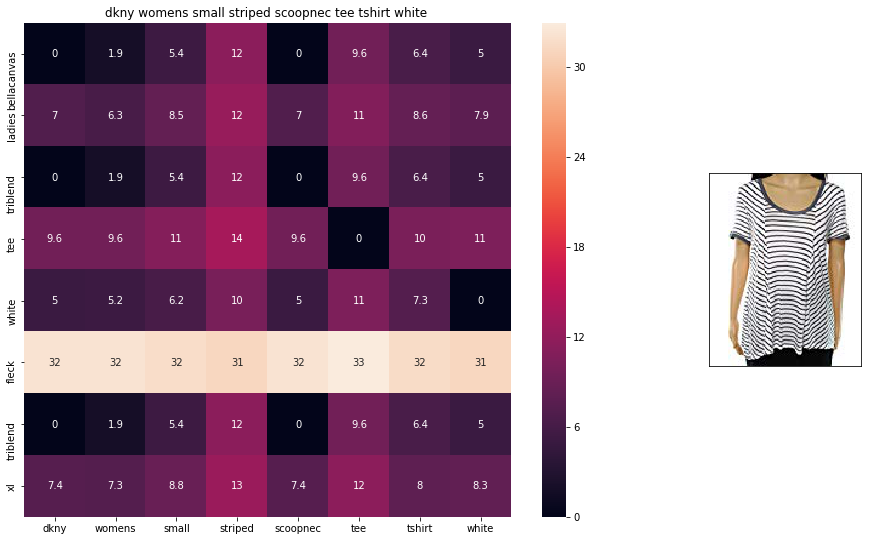

ASIN : B0725PWQFW
Brand : DKNY
euclidean distance from input : 4.0289044


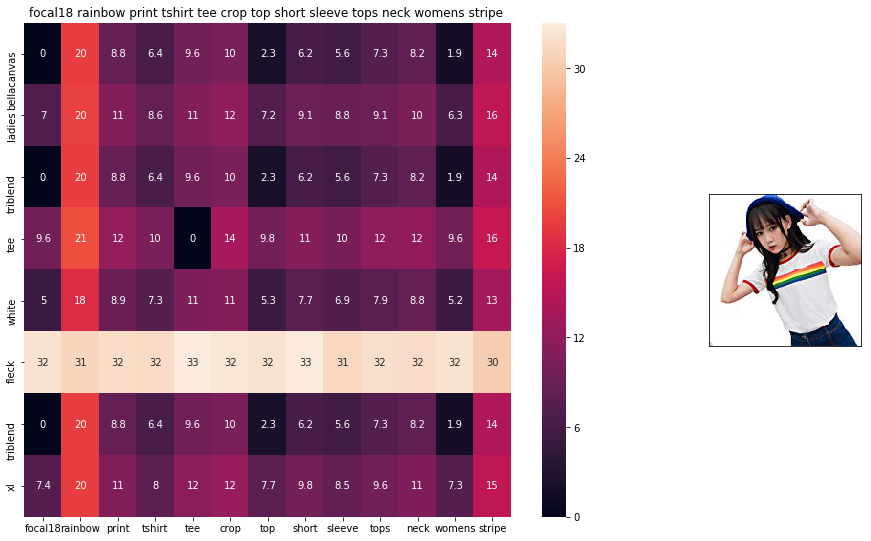

ASIN : B01N19SJ9F
Brand : Focal18
euclidean distance from input : 4.028968


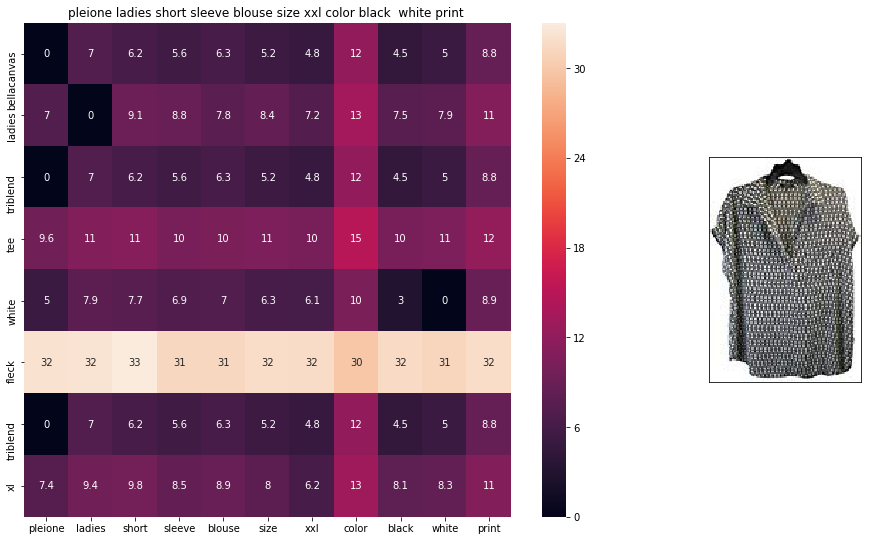

ASIN : B073RHSCSV
Brand : Pleione
euclidean distance from input : 4.0300336


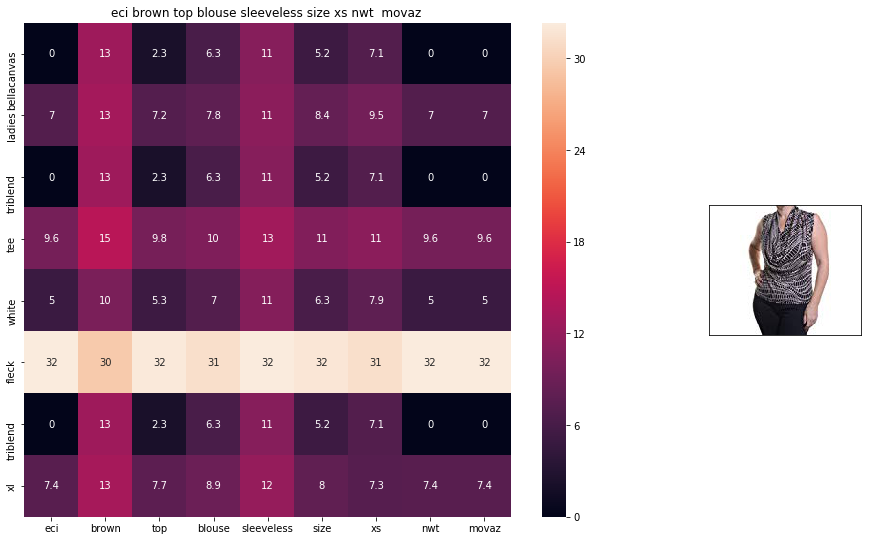

ASIN : B01632Q6Y2
Brand : ECI
euclidean distance from input : 4.0366445


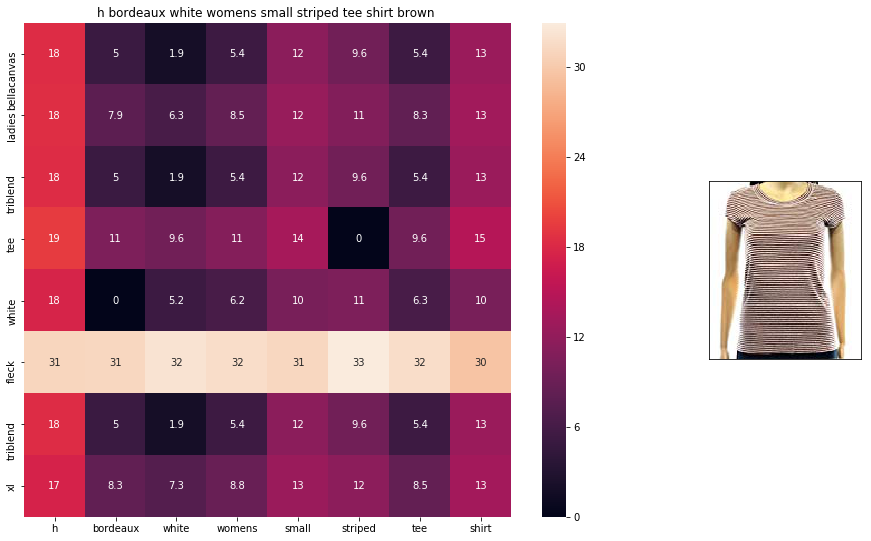

ASIN : B072BVB47Z
Brand : H By Bordeaux
euclidean distance from input : 4.0370307


In [0]:
def weighted_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'weighted')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

weighted_w2v_model(12566, 20)
#931
#12566
# in the give heat map, each cell contains the euclidean distance between words i, j

In [0]:
doc_id = 0
w2v_title_weight = []
# for every title we build a weighted vector representation
for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1
# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title_weight = np.array(w2v_title_weight)

################# **weighted similarity using brand and color**########################**

In [0]:
def heat_map_w2v_brand(sentance1, sentance2, url, doc_id1, doc_id2, df_id1, df_id2, model):
    
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # df_id1: index of document1 in the data frame
    # df_id2: index of document2 in the data frame
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentance1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title2 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentance2, doc_id2, model)
    
    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)
   
    data_matrix = [['Asin','Brand', 'Color', 'Product type'],
               [data['asin'].loc[df_id1],brands[doc_id1], colors[doc_id1], types[doc_id1]], # input apparel's features
               [data['asin'].loc[df_id2],brands[doc_id2], colors[doc_id2], types[doc_id2]]] # recommonded apparel's features
    
    colorscale = [[0, '#1d004d'],[.5, '#f2e5ff'],[1, '#f2e5d1']] # to color the headings of each column 
    
    # we create a table with the data_matrix
    table = ff.create_table(data_matrix, index=True, colorscale=colorscale)
    # plot it with plotly
    plotly.offline.iplot(table, filename='simple_table')
    
    # devide whole figure space into 25 * 1:10 grids
    gs = gridspec.GridSpec(25, 15)
    fig = plt.figure(figsize=(25,5))
    
    # in first 25*10 grids we plot heatmap
    ax1 = plt.subplot(gs[:, :-5])
    # ploting the heap map based on the pairwise distances
    ax1 = sns.heatmap(np.round(s1_s2_dist,6), annot=True)
    # set the x axis labels as recommended apparels title
    ax1.set_xticklabels(sentance2.split())
    # set the y axis labels as input apparels title
    ax1.set_yticklabels(sentance1.split())
    # set title as recommended apparels title
    ax1.set_title(sentance2)

    # in last 25 * 10:15 grids we display image
    ax2 = plt.subplot(gs[:, 10:16])
    # we dont display grid lins and axis labels to images
    ax2.grid(False)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    # pass the url it display it
    display_img(url, ax2, fig)
    
    plt.show()

In [0]:
data['brand'].fillna(value='notgiven',inplace=True)


In [0]:
brands=[x.replace(" ","-") for x in data['brand'].values]
types=[x.replace(" ",'-') for x in data['product_type_name'].values]
colors=[x.replace(" ",'-') for x in data['color'].values]

In [0]:
from scipy.sparse import hstack
brandvectorizer=CountVectorizer()
brandfeatures=brandvectorizer.fit_transform(brands)
typevectorizer=CountVectorizer()
typefeatures=typevectorizer.fit_transform(types)
colorvectorizer=CountVectorizer()
colorfeatures=colorvectorizer.fit_transform(colors)
extrafeatures=hstack((brandfeatures,typefeatures,colorfeatures))

In [0]:
print(extrafeatures.shape)

(28329, 6192)


#steps in constructing a weighted model
* 1.create a word2vec model of every title present and take it in the form of array.
*  2.take the query product and their weights that have to begiven to variouus features
* 3.comput the pairwise distances of the product with rest all product from the vector of word2vec
* 4.we also have the features of brand ,type and colour(we got in form of bagofwords) compute pair wise distances with rest all and sore them 
* 5.now total pairwise distances is(w1*pairwisedistances of title features)+(w2*pairwisedistances of restall features)
* 6.get the smallest distances and sort them based on index get 5 small distances
* 7.check the ids at tha particular indexes
* 8.print their title brand distances and image of product and its vectorizer




In [0]:
# some of the brand values are empty. 
# Need to replace Null with string "NULL"
data['brand'].fillna(value="Not given", inplace=True )

# replace spaces with hypen
brands = [x.replace(" ", "-") for x in data['brand'].values]
types = [x.replace(" ", "-") for x in data['product_type_name'].values]
colors = [x.replace(" ", "-") for x in data['color'].values]

brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

type_vectorizer = CountVectorizer()
type_features = type_vectorizer.fit_transform(types)

color_vectorizer = CountVectorizer()
color_features = color_vectorizer.fit_transform(colors)

extra_features = hstack((brand_features, type_features, color_features)).tocsr()

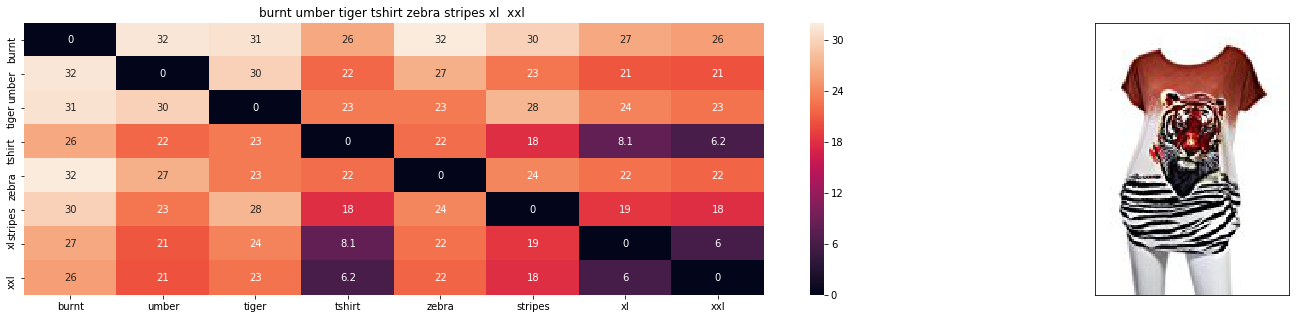

ASIN : B00JXQB5FQ
Brand : Si Row
euclidean distance from input : 0.001953125


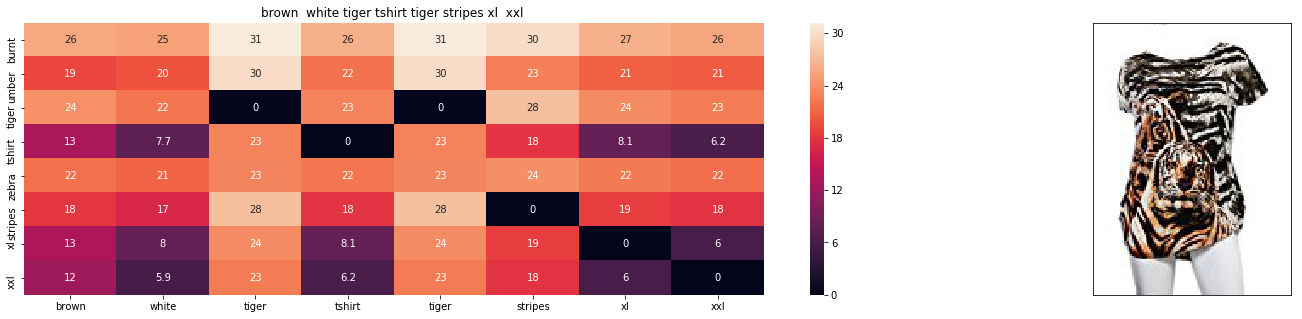

ASIN : B00JXQCWTO
Brand : Si Row
euclidean distance from input : 2.38547115326


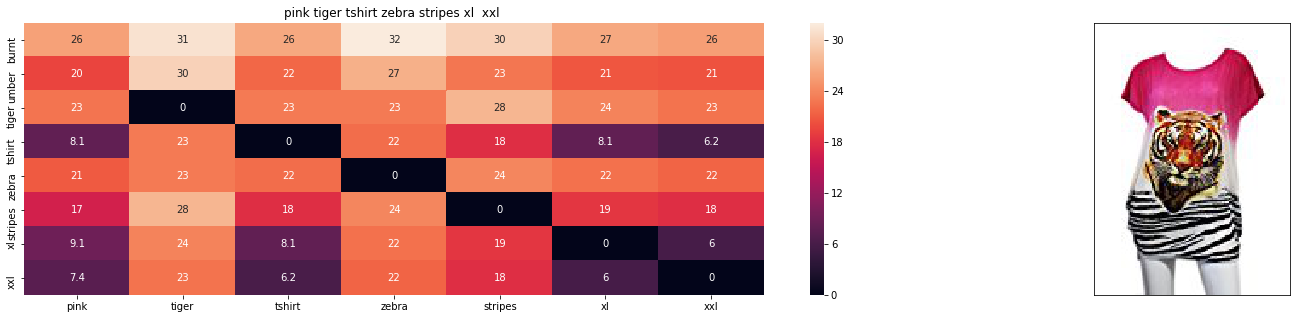

ASIN : B00JXQASS6
Brand : Si Row
euclidean distance from input : 2.73905105609


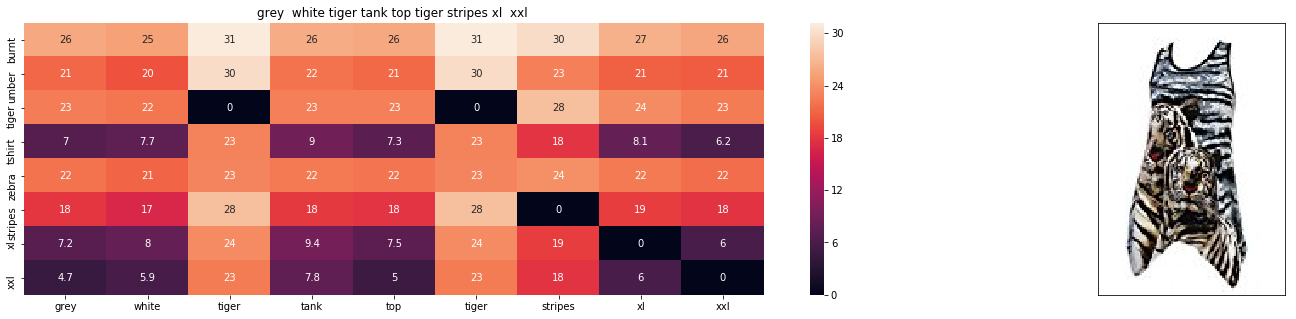

ASIN : B00JXQAFZ2
Brand : Si Row
euclidean distance from input : 3.387187195


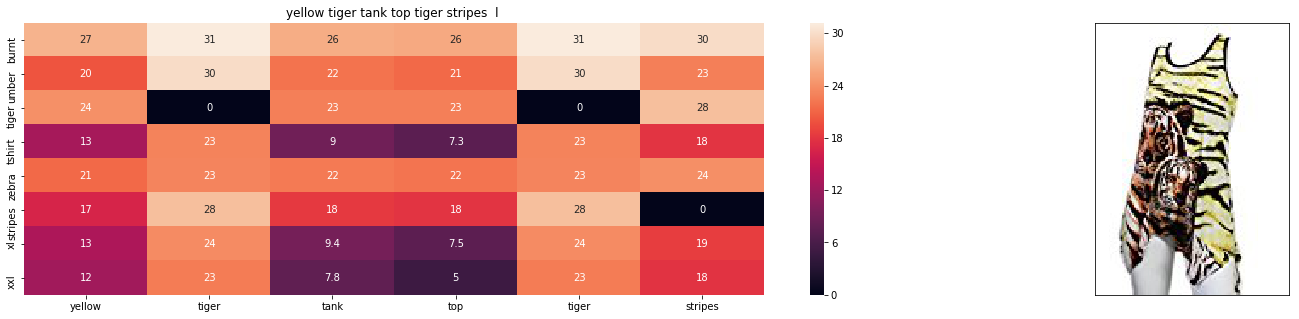

ASIN : B00JXQAUWA
Brand : Si Row
euclidean distance from input : 3.5518684389


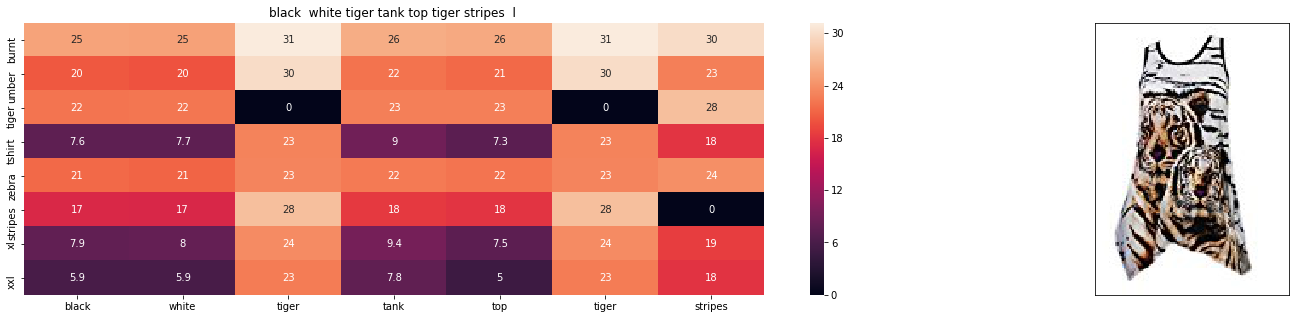

ASIN : B00JXQAO94
Brand : Si Row
euclidean distance from input : 3.5536174776


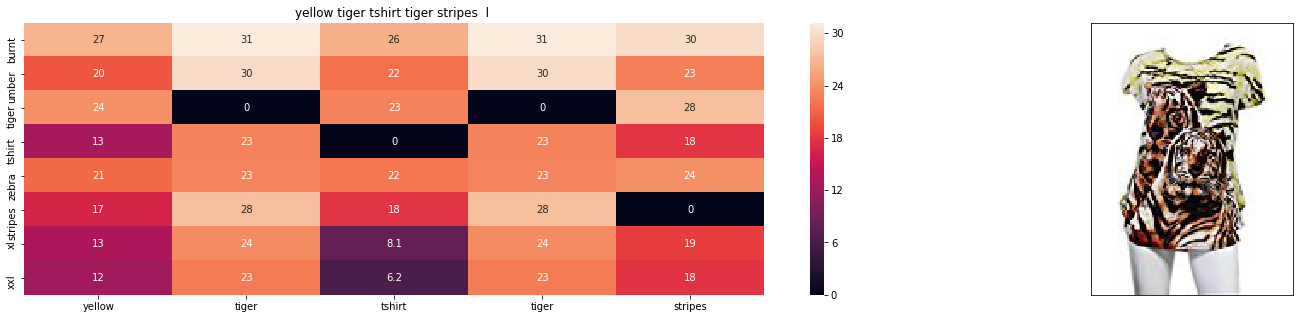

ASIN : B00JXQCUIC
Brand : Si Row
euclidean distance from input : 3.65382804889


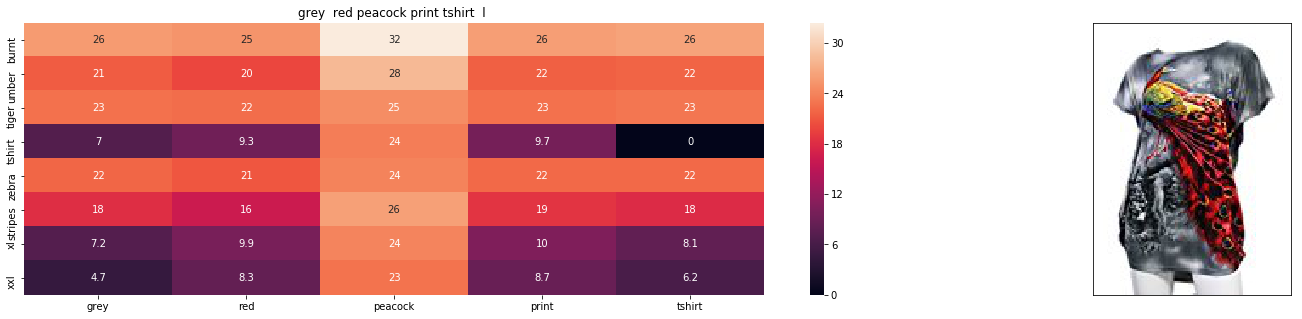

ASIN : B00JXQCFRS
Brand : Si Row
euclidean distance from input : 4.12881164569


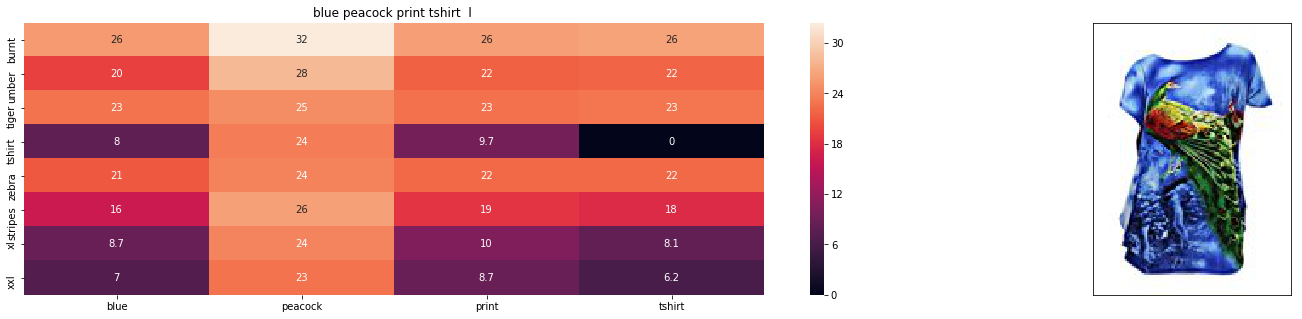

ASIN : B00JXQC8L6
Brand : Si Row
euclidean distance from input : 4.20390052813


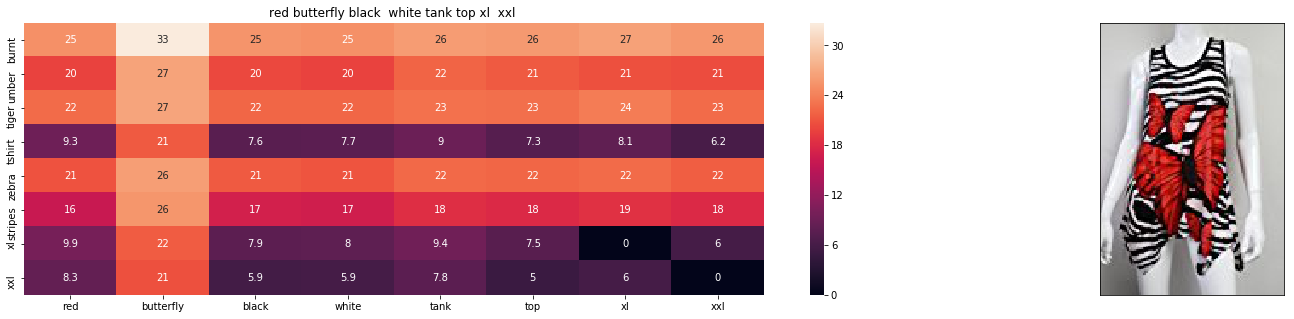

ASIN : B00JV63CW2
Brand : Si Row
euclidean distance from input : 4.28658676166


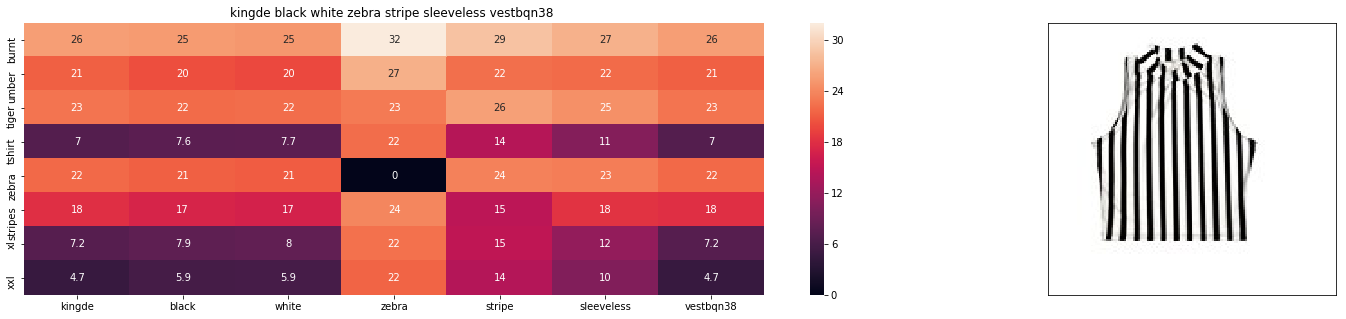

ASIN : B015H41F6G
Brand : KINGDE
euclidean distance from input : 4.38937078798


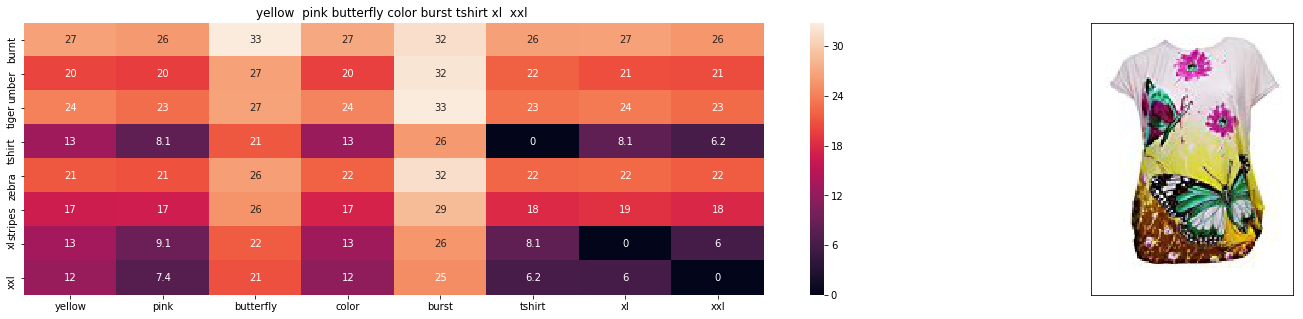

ASIN : B00JXQBBMI
Brand : Si Row
euclidean distance from input : 4.39790992755


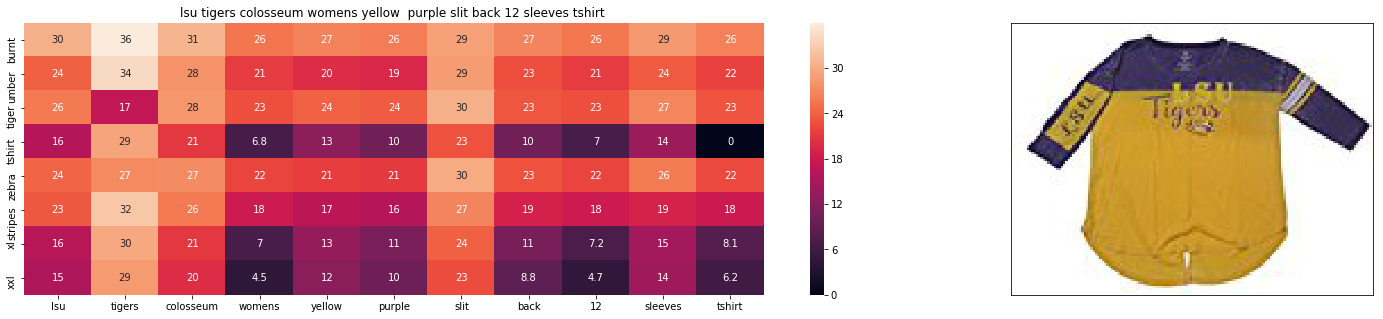

ASIN : B073R5Q8HD
Brand : Colosseum
euclidean distance from input : 4.45122858369


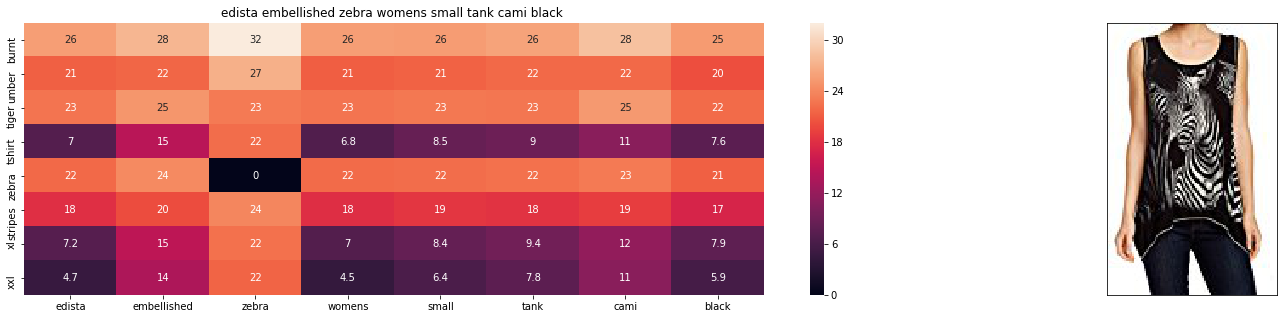

ASIN : B074P8MD22
Brand : Edista
euclidean distance from input : 4.51897779787


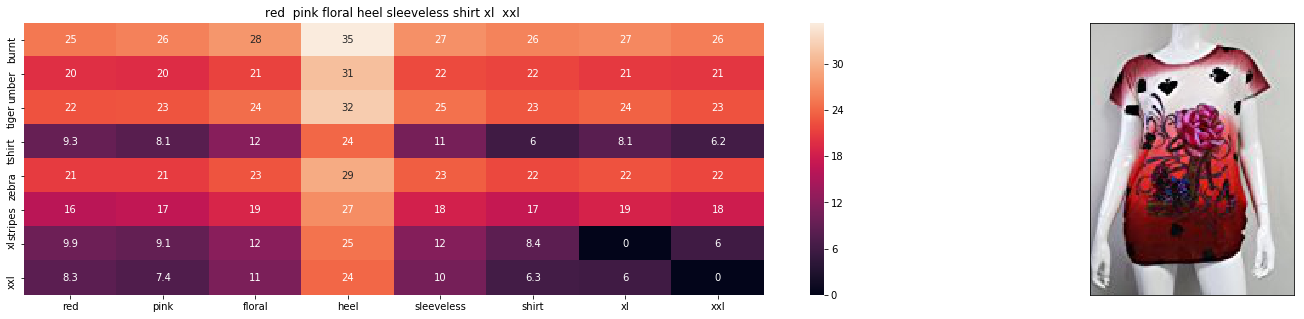

ASIN : B00JV63QQE
Brand : Si Row
euclidean distance from input : 4.52937545794


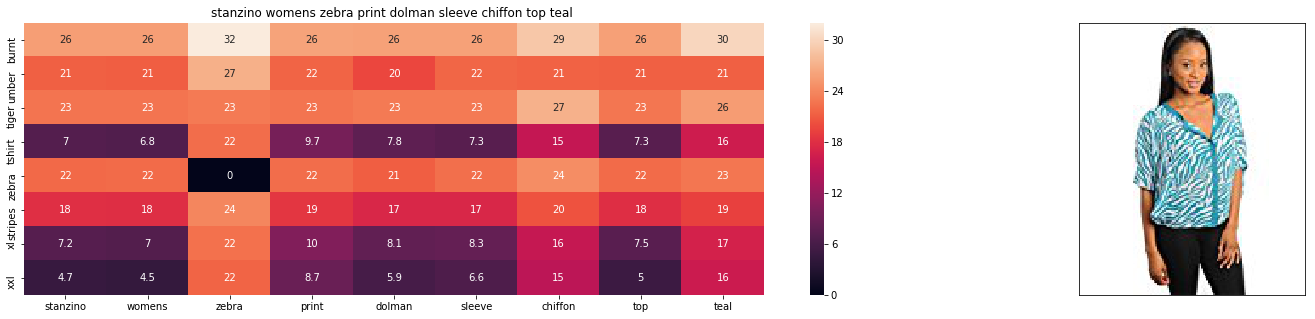

ASIN : B00C0I3U3E
Brand : Stanzino
euclidean distance from input : 4.53032614076


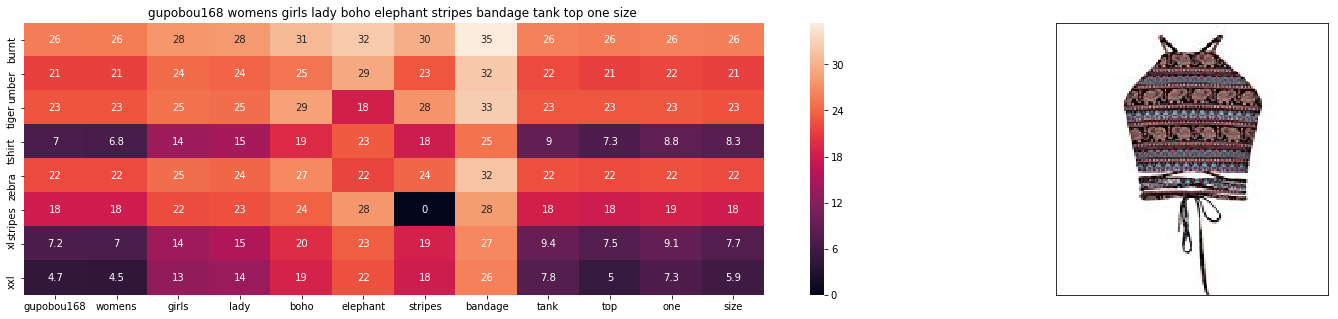

ASIN : B01ER184O6
Brand : GuPoBoU168
euclidean distance from input : 4.54681702403


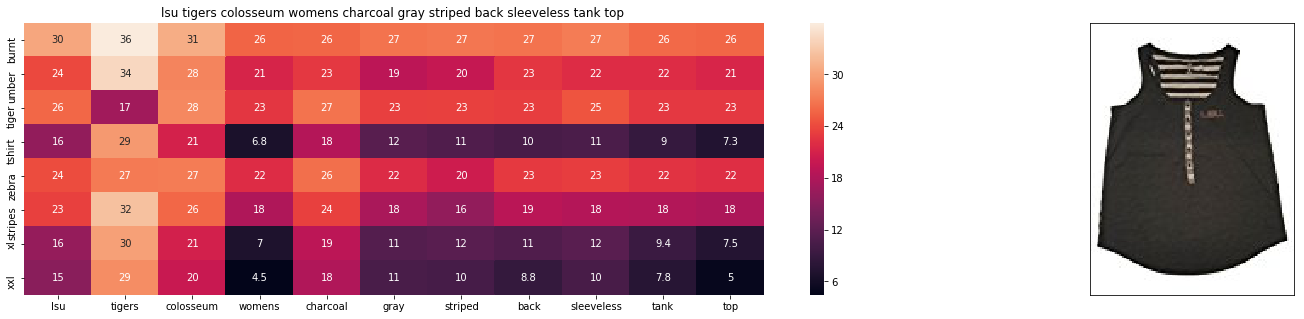

ASIN : B073R4ZM7Y
Brand : Colosseum
euclidean distance from input : 4.54835554445


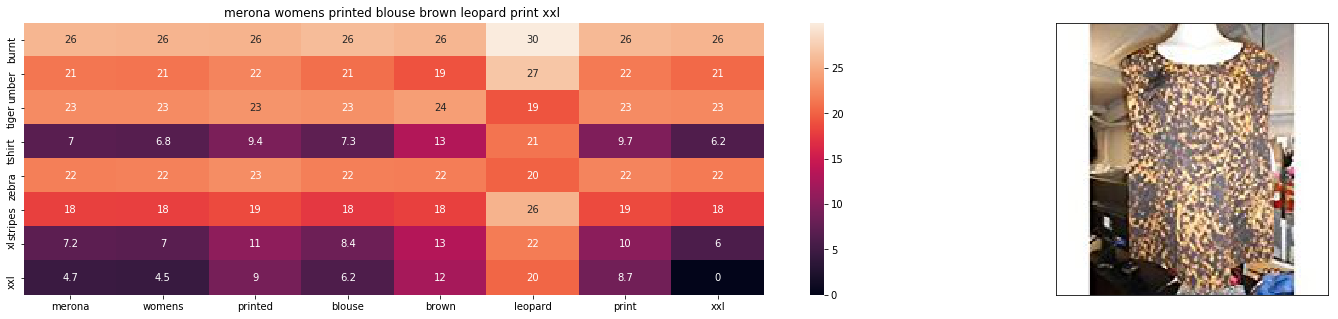

ASIN : B071YF3WDD
Brand : Merona
euclidean distance from input : 4.61062742555


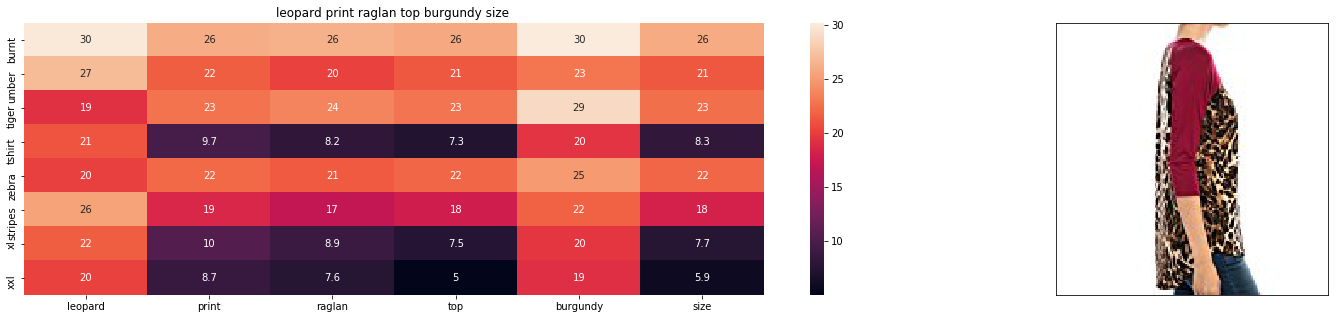

ASIN : B01C6ORLDQ
Brand : 1 Mad Fit
euclidean distance from input : 4.64591789282


In [0]:
def idf_w2v_brand(doc_id, w1, w2, num_results):
    # doc_id: apparel's id in given corpus
    # w1: weight for  w2v features
    # w2: weight for brand and color features

    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    idf_w2v_dist  = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    pairwise_dist   = (w1 * idf_w2v_dist +  w2 * ex_feat_dist)/float(w1 + w2)

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    

    for i in range(0, len(indices)):
        heat_map_w2v_brand(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i],df_indices[0], df_indices[i], 'weighted')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

idf_w2v_brand(12566, 5, 5, 20)
# in the give heat map, each cell contains the euclidean distance between words i, j

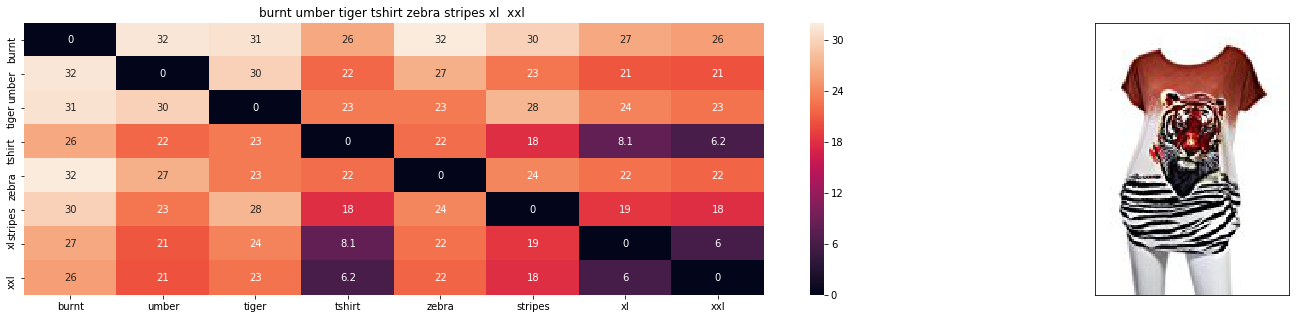

ASIN : B00JXQB5FQ
Brand : Si Row
euclidean distance from input : 0.000355113636364


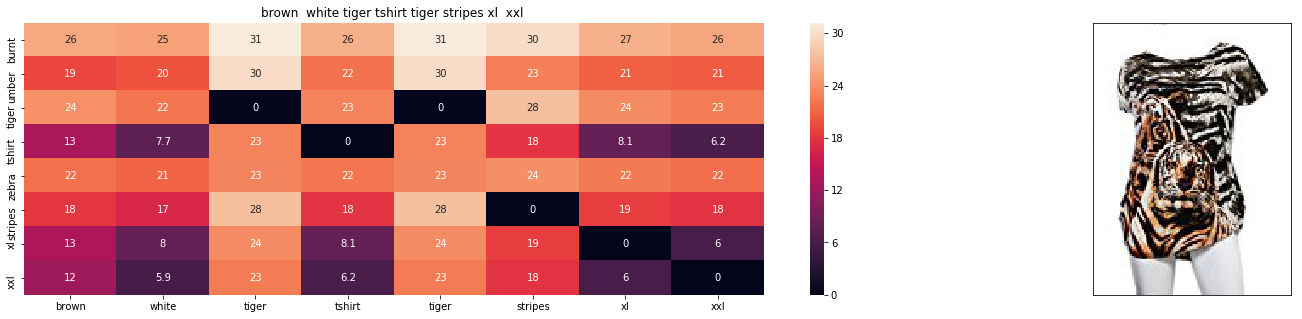

ASIN : B00JXQCWTO
Brand : Si Row
euclidean distance from input : 0.433722027865


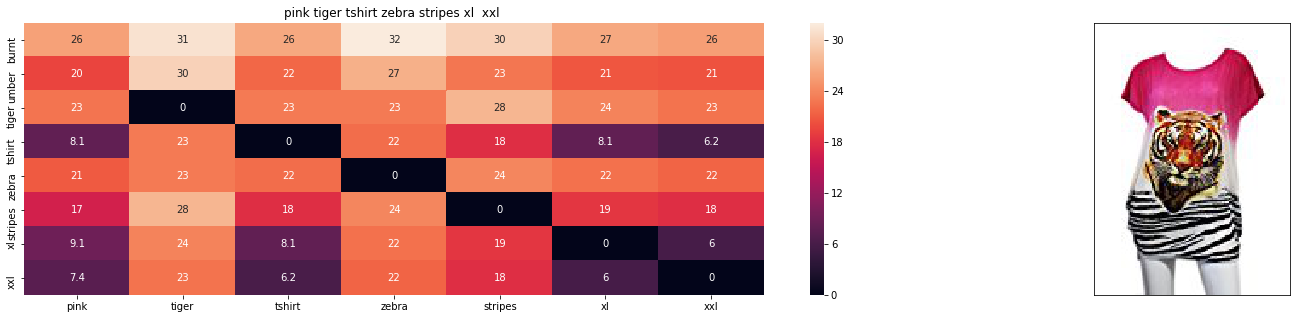

ASIN : B00JXQASS6
Brand : Si Row
euclidean distance from input : 1.65509310669


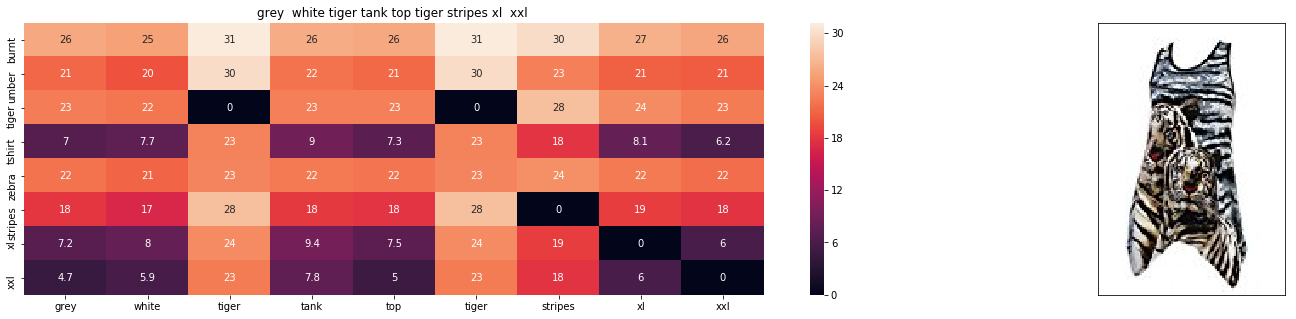

ASIN : B00JXQAFZ2
Brand : Si Row
euclidean distance from input : 1.77293604103


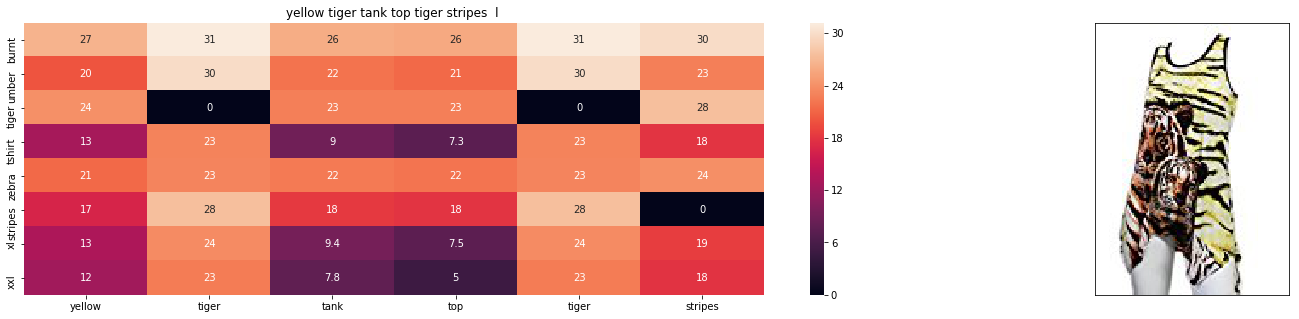

ASIN : B00JXQAUWA
Brand : Si Row
euclidean distance from input : 1.80287808538


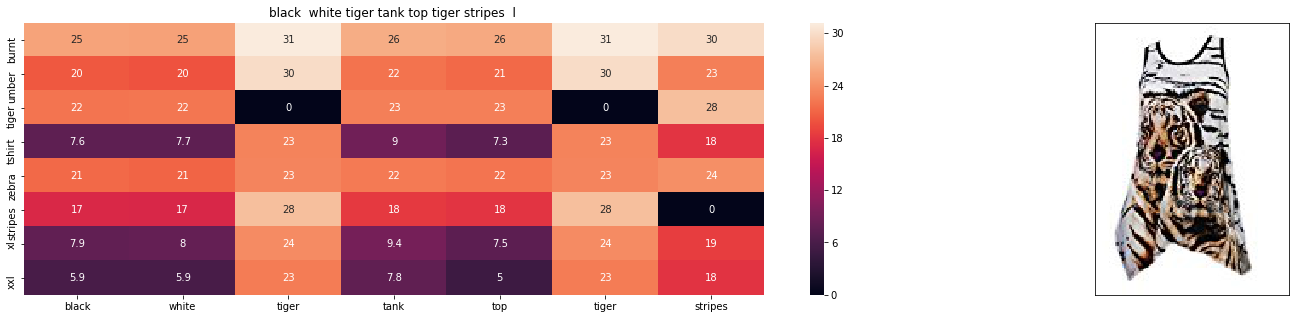

ASIN : B00JXQAO94
Brand : Si Row
euclidean distance from input : 1.80319609241


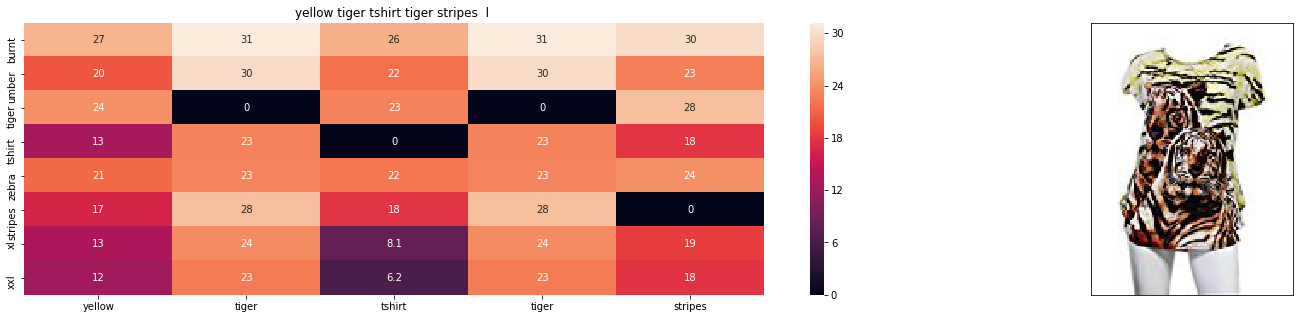

ASIN : B00JXQCUIC
Brand : Si Row
euclidean distance from input : 1.82141619628


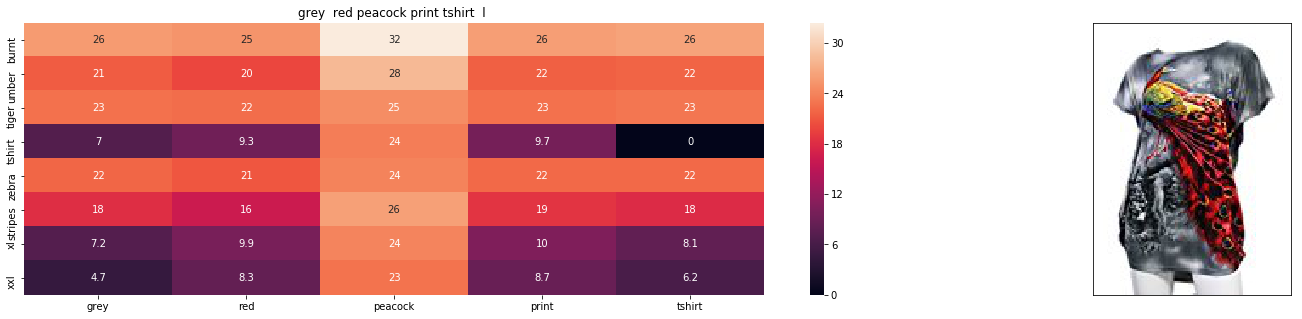

ASIN : B00JXQCFRS
Brand : Si Row
euclidean distance from input : 1.90777685025


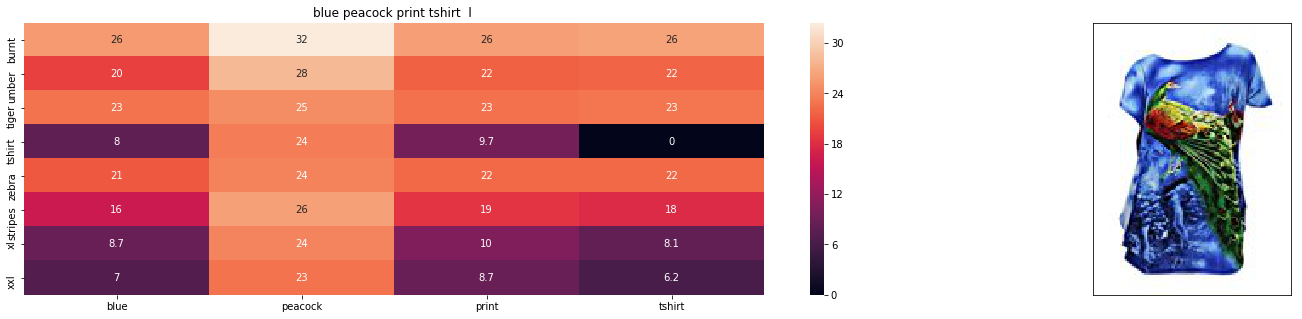

ASIN : B00JXQC8L6
Brand : Si Row
euclidean distance from input : 1.92142937433


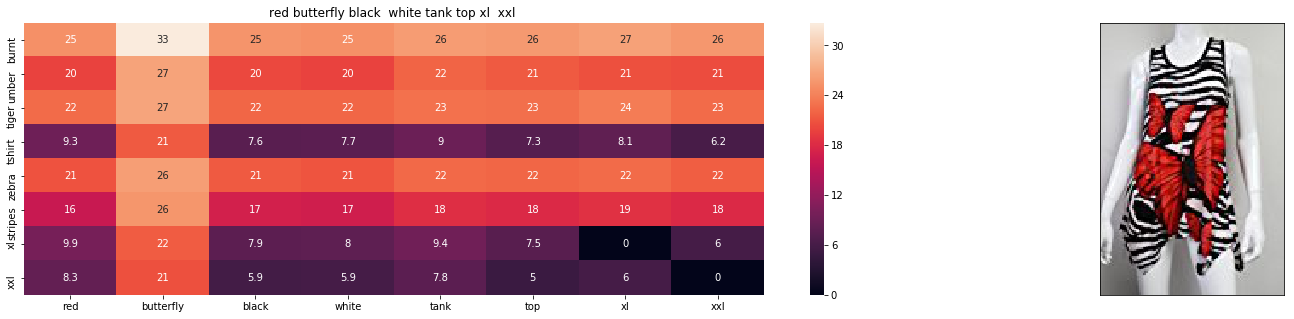

ASIN : B00JV63CW2
Brand : Si Row
euclidean distance from input : 1.93646323497


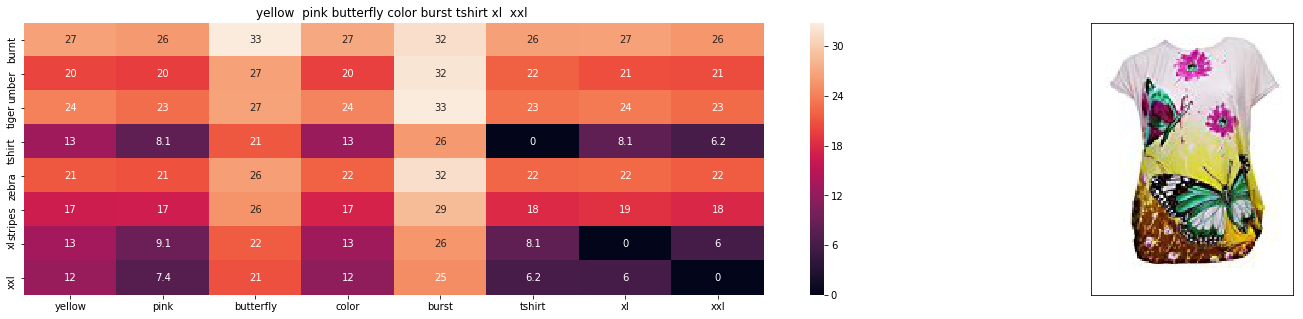

ASIN : B00JXQBBMI
Brand : Si Row
euclidean distance from input : 1.95670381059


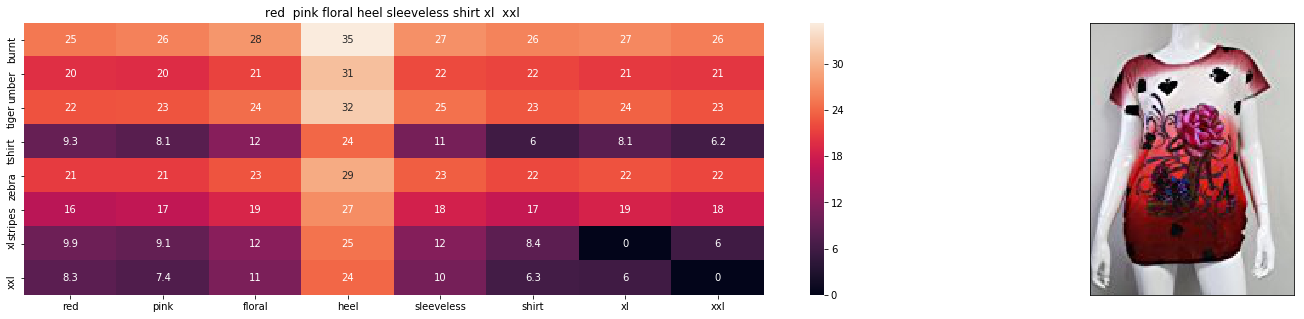

ASIN : B00JV63QQE
Brand : Si Row
euclidean distance from input : 1.9806066343


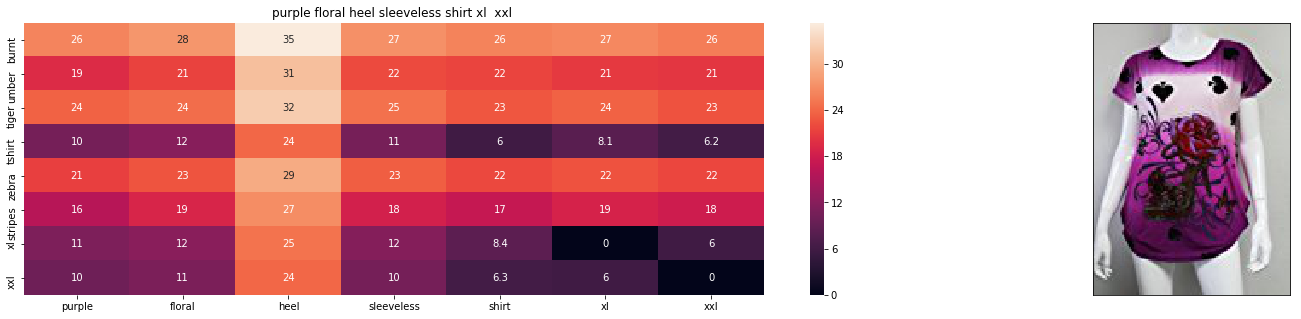

ASIN : B00JV63VC8
Brand : Si Row
euclidean distance from input : 2.01218559992


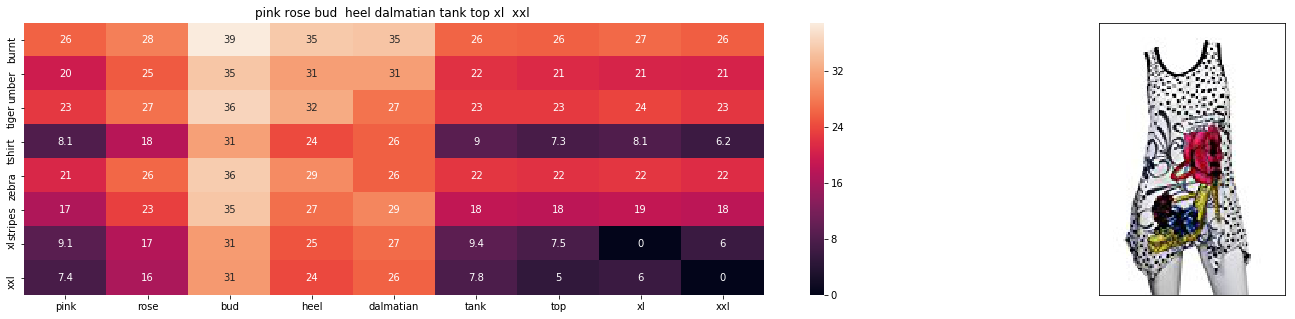

ASIN : B00JXQAX2C
Brand : Si Row
euclidean distance from input : 2.01335178755


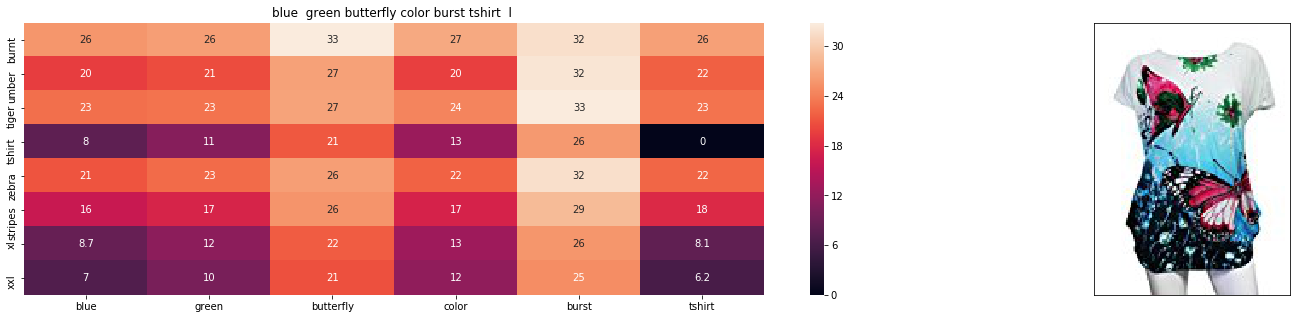

ASIN : B00JXQC0C8
Brand : Si Row
euclidean distance from input : 2.01388334827


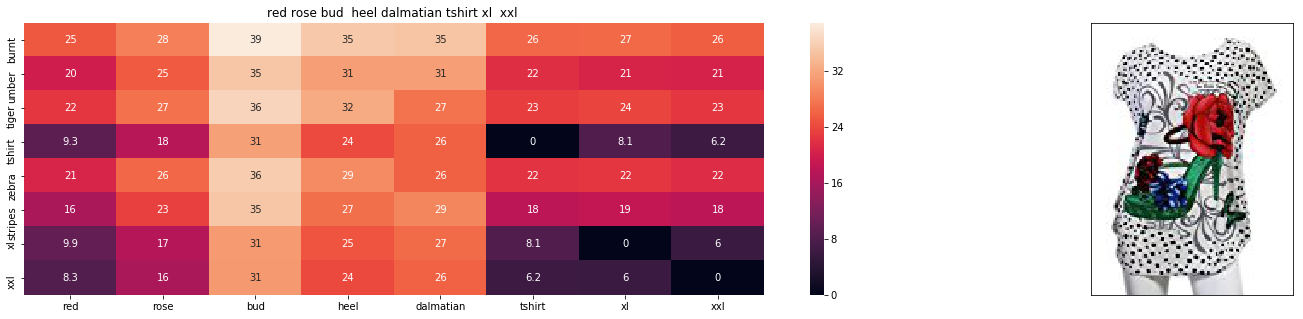

ASIN : B00JXQABB0
Brand : Si Row
euclidean distance from input : 2.0367257555


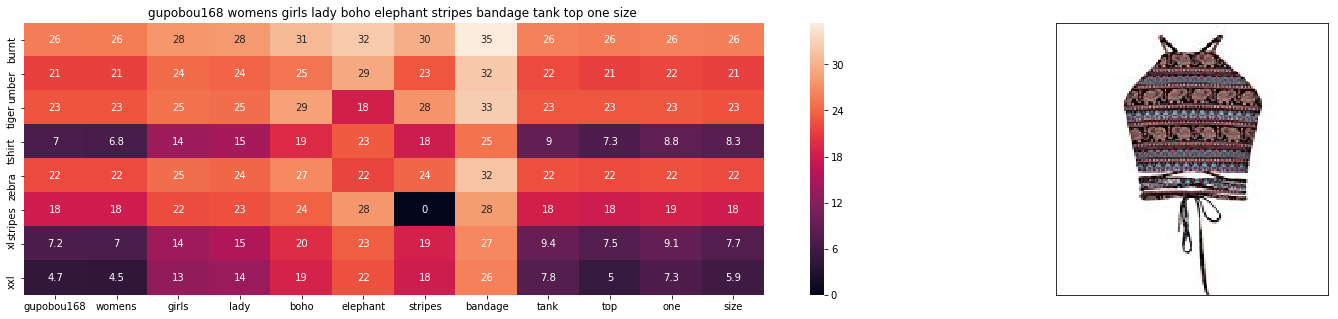

ASIN : B01ER184O6
Brand : GuPoBoU168
euclidean distance from input : 2.65620416778


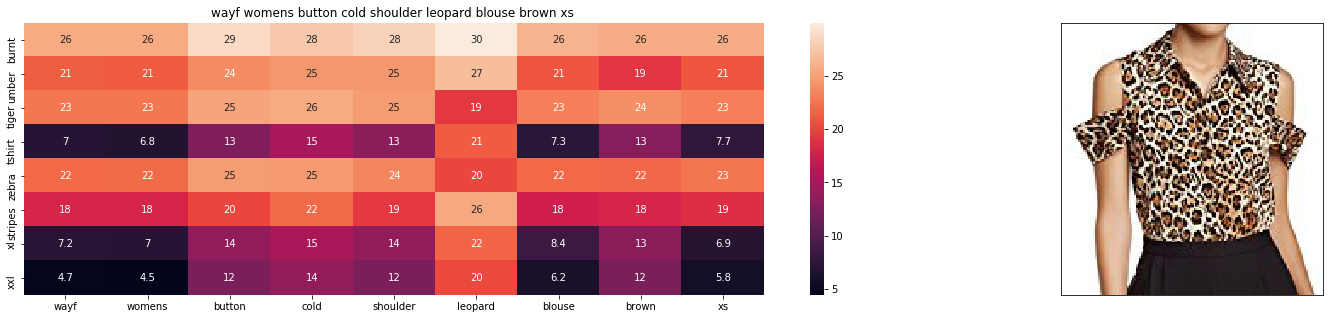

ASIN : B01LZ7BQ4H
Brand : WAYF
euclidean distance from input : 2.6849067823


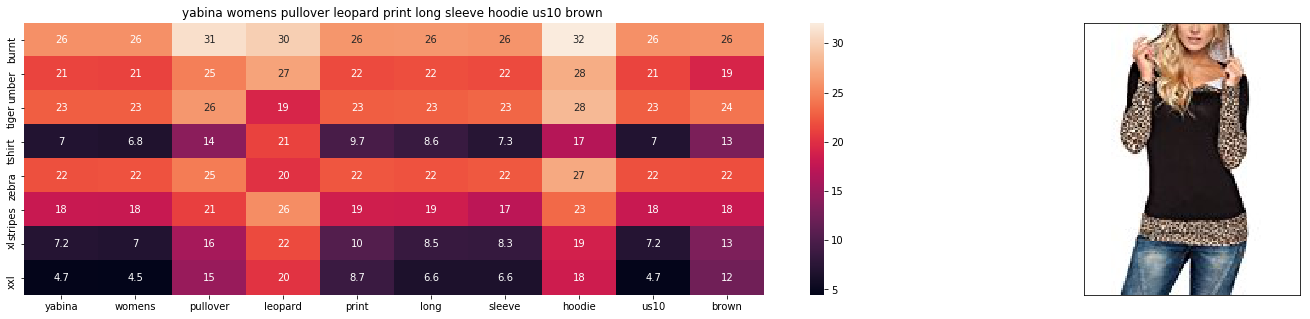

ASIN : B01KJUM6JI
Brand : YABINA
euclidean distance from input : 2.68583819266


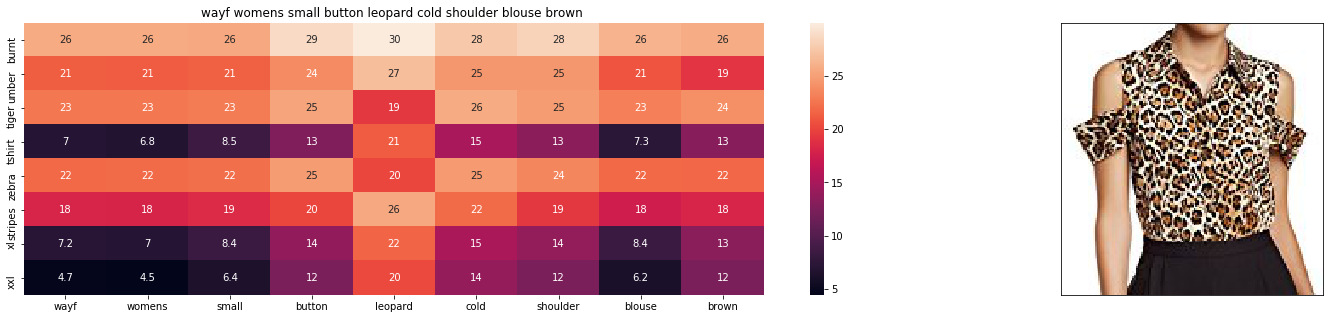

ASIN : B01M06V4X1
Brand : WAYF
euclidean distance from input : 2.69476194865


In [0]:
# brand and color weight =50
# title vector weight = 5

idf_w2v_brand(12566, 5, 50, 20)

#we have the images actaully we can also use convolutional nueral networks to find the similart images and reccomend trhem
* we have marvelous library called image data generator fro keras.preprocessing.image
* using this library we can convert image into the form of data
* application library of keras different archetictures og convolutional nueral network like vgg16,alexnet etc..




In [0]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout,Flatten,Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
#from pil import Image
import pandas as pd
import pickle

Using TensorFlow backend.


In [0]:
link = 'https://drive.google.com/open?id=1Ga4C3a15CPGuda_yiIftB3MlEUoOQc1n' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1Ga4C3a15CPGuda_yiIftB3MlEUoOQc1n


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Copy of 16k_data_cnn_features.npy')  
bottleneck_features_train = np.load('Copy of 16k_data_cnn_features.npy')

In [0]:
print(bottleneck_features_train[500])

[0.29368082 0.         0.         ... 0.         0.39461273 0.        ]


In [0]:
link = 'https://drive.google.com/open?id=170a0poBDxvwQ3xCDKPvZE5Ed9CidQ-wF' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

170a0poBDxvwQ3xCDKPvZE5Ed9CidQ-wF


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Copy of 16k_data_cnn_feature_asins.npy')  


In [0]:
import pandas as pd
import pickle


In [0]:
asins=np.load('Copy of 16k_data_cnn_feature_asins.npy')
asins=list(asins)

In [0]:
print(asins[500])

B008LT2J3S


In [0]:
link1 = 'https://drive.google.com/open?id=1LDeKRyjzohT_od7GPvPVheV-O3t2Hu-X' # The shareable link

In [0]:
fluff, id = link1.split('=')
print (id) # Verify that you have everything after '='

1LDeKRyjzohT_od7GPvPVheV-O3t2Hu-X


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Copy of 16k_apperal_data_preprocessed')  


In [0]:
import pandas as pd
import pickle


In [0]:
newdata1=pd.read_pickle('Copy of 16k_apperal_data_preprocessed')

newdata=newdata1
df_asins=list(newdata['asin'])

* now we have data of identification number of product and vector obtained after performing convolutionallayer with architecture of vggnet of each product
* we have the vector obtained of products 
* we will wirte a function and print products that are similar

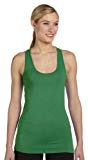

Product Title:  Alo Sport Ladies Bamboo Racerback Tank. W2006-LEAF/SLATE-XL
Euclidean Distance from input image: 0.03125
Amazon Url: www.amzon.com/dp/B0023UNW7I


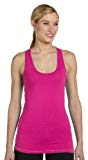

Product Title:  Alo Sport - Ladies' Racerback Bamboo Tank
Euclidean Distance from input image: 14.521401
Amazon Url: www.amzon.com/dp/B003IWOLYS


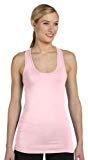

Product Title:  Alo Sport Ladies' Bamboo Racerback Tank - PINK/WHITE - XS
Euclidean Distance from input image: 21.639605
Amazon Url: www.amzon.com/dp/B004J8LKP8


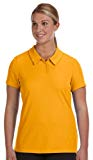

Product Title:  Alo Ladies Junior Fit Performance Mesh Polo Shirt. W1709 Large Sport Athletic Gold
Euclidean Distance from input image: 37.78683
Amazon Url: www.amzon.com/dp/B00PH3DJC6


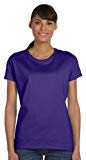

Product Title:  Fruit of the Loom Ladies 100% Heavy Cotton HD T-Shirt, XL, PURPLE
Euclidean Distance from input image: 38.868305
Amazon Url: www.amzon.com/dp/B014WBV6E6


In [0]:
#get similar products using CNN features (VGG-16)
from IPython.display import display, Image, SVG, Math, YouTubeVideo
def get_similar_products_cnn(doc_id, num_results):
    doc_id = asins.index(df_asins[doc_id])
    pairwise_dist = pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    for i in range(len(indices)):
        rows = data[['medium_image_url','title']].loc[data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            print('Euclidean Distance from input image:', pdists[i])
            print('Amazon Url: www.amzon.com/dp/'+ asins[indices[i]])

get_similar_products_cnn(500,5)


# ASSIGNMENT STARTS FROM HERE.
* create a weighted model for with text,brand,color,image
* image features form vgg16
* textfeatures from idfw2v
* brandfeatrues from onehotencoding
* color features from onehotencoding
* hstack all of them 
* find the nearest distances
* reccomend the nearest products

* for this we want to work on 16kdata instead of 28k data we were working on

In [0]:
newdata.head(5)


asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
15  B003BSRPB0                  FeatherLite              White   
27  B014ICEJ1Q                        FNC7C             Purple   
46  B01NACPBG2                 Fifth Degree              Black   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
27  https://images-na.ssl-images-amazon.com/images...             SHIRT   
46  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   featherlite ladies long sleeve stain resistant...          $26.26  
6   womens unique 100 cotton  special olympics wor...           $9.99  
15  featherlite ladies moisture free mesh sport sh...          $20.54  
27  supernatural chibis sam dean castiel neck tshi...           $7.39  
46  fifth degree womens gold foil graphic tees jun...           $6.95

In [0]:
newdata['brand']=newdata['brand'].fillna('FeatherLite')
newdata['brand']=newdata['brand'].str.lower()

In [0]:
newdata['color']=newdata['color'].str.lower()
newdata['title']=newdata['title'].str.lower()

In [0]:
#buliding the bag of words model for brand feature to get the features of brand
from sklearn.feature_extraction.text import CountVectorizer
countvect=CountVectorizer()
brandfeatures=countvect.fit_transform(newdata['brand'])

In [0]:
print(brandfeatures.shape)

(16042, 3834)


In [0]:
#creating the bag of words model for color feature to get the features of color
colorcountvect=CountVectorizer()
colorfeatures=colorcountvect.fit_transform(newdata['color'])

In [0]:
print(colorfeatures.shape)

(16042, 1845)


In [0]:
#bottleneck features that are the features that are obtained for image 
#that were obtained on applying convolutional nueral network onb top of images
print(bottleneck_features_train.shape)

(16042, 25088)


In [0]:
def preprocessing(text,index,column):
    if type(text) is not int:
        string=""
        for words in text.split():
            word=("".join(e for e in words if e.isalnum()))
            word=word.lower()
            if word not in stop:
                string=string+word+" "
                newdata[column][index]=string
for index,row in newdata.iterrows():
    preprocessing(row['title'],index,'title')

In [0]:
newdata['title']=newdata['title'].str.replace('  ',' ')


In [0]:
print(newdata['title'].iloc[2])

featherlite ladies moisture free mesh sport shirt white xxxlarge 


In [0]:
#training word2vecmodel for the titles in the data 
listofsentances=[]
for sentence in newdata['title'].values:
  listofsentances.append(sentence.split())
  
  

In [0]:
print(listofsentances[0])

['featherlite', 'ladies', 'long', 'sleeve', 'stain', 'resistant', 'tapered', 'twill', 'shirt', '2xl', 'onyx', 'black', 'stone']


In [0]:
from gensim.models import Word2Vec
word2vecmodel=Word2Vec(listofsentances,min_count=0,size=300)
print(word2vecmodel.most_similar('featherlite'))

[('34sleeve', 0.9990441799163818), ('ladyfit', 0.9988951683044434), ('jeremy', 0.9984316825866699), ('russell', 0.998412549495697), ('blended', 0.998410701751709), ('fruit', 0.9983769059181213), ('tapered', 0.9983147382736206), ('pima', 0.998293399810791), ('logo', 0.9982887506484985), ('effect', 0.9982719421386719)]


In [0]:
vocab=list(word2vecmodel.wv.vocab)
print(vocab)

['featherlite', 'ladies', 'long', 'sleeve', 'stain', 'resistant', 'tapered', 'twill', 'shirt', '2xl', 'onyx', 'black', 'stone', 'womens', 'unique', '100', 'cotton', 'special', 'olympics', 'world', 'games', '2015', 'white', 'size', 'l', 'moisture', 'free', 'mesh', 'sport', 'xxxlarge', 'supernatural', 'chibis', 'sam', 'dean', 'castiel', 'neck', 'tshirts', 'female', 'purple', 'fifth', 'degree', 'gold', 'foil', 'graphic', 'tees', 'junior', 'top', 'short', 'printed', 'women', 'feel', 'piece', 'sami', 'dip', 'dye', 'one', 'navy', 'fuchsia', 'pink', 'seamless', 'set', 'tube', 'finejo', 'sleeveless', 'lace', 'shirts', 'high', 'low', 'tops', 'blouses', 'puma', 'ferrari', 'big', 'shield', 'tee', 'rosso', 'corsa', 'tshirt', 'xl', 'vein', 'angels', 'diamonds', '34', 'sequin', 'cross', 'rhinestone', 'fifteentwenty', 'shirred', 'hem', 'ruffle', 'blouse', 'eggshell', 'medium', 'gloves', 'satin', 'west', 'ham', 'united', 'fc', 'logo', 'pique', 'forest', 'green', 'xxlarge', 'super', 'soft', 'turtleneck

In [0]:
print(word2vecmodel['featherlite'][:10])
#we have generate word2vec for each and everyword in out corpus
#we wewant idf weighted word2vec

[-0.00431496  0.00611586 -0.01298477 -0.04649206 -0.00406396  0.02449529
 -0.01064057 -0.02398858 -0.04546523  0.00016808]


In [0]:
#if we have to give idf weighted word2vec
#we should compute the idf values first
#first we will calcualte count vectorizer and replace them with idf values
idftitlevect=CountVectorizer()
idffeature=idftitlevect.fit_transform(newdata['title'])


In [0]:
print(idftitlevect.vocabulary_)

{'featherlite': 4537, 'ladies': 6509, 'long': 6847, 'sleeve': 10144, 'stain': 10489, 'resistant': 9189, 'tapered': 10903, 'twill': 11554, 'shirt': 9859, '2xl': 459, 'onyx': 8105, 'black': 2082, 'stone': 10562, 'womens': 12253, 'unique': 11649, '100': 42, 'cotton': 3395, 'special': 10374, 'olympics': 8084, 'world': 12286, 'games': 4980, '2015': 237, 'white': 12082, 'size': 10052, 'moisture': 7541, 'free': 4846, 'mesh': 7345, 'sport': 10431, 'xxxlarge': 12421, 'supernatural': 10717, 'chibis': 2986, 'sam': 9526, 'dean': 3706, 'castiel': 2800, 'neck': 7826, 'tshirts': 11468, 'female': 4555, 'purple': 8914, 'fifth': 4601, 'degree': 3740, 'gold': 5141, 'foil': 4762, 'graphic': 5209, 'tees': 10987, 'junior': 6212, 'top': 11240, 'short': 9934, 'printed': 8811, 'women': 12245, 'feel': 4546, 'piece': 8493, 'sami': 9528, 'dip': 3869, 'dye': 4087, 'one': 8094, 'navy': 7790, 'fuchsia': 4910, 'pink': 8522, 'seamless': 9672, 'set': 9745, 'tube': 11495, 'finejo': 4617, 'sleeveless': 10151, 'lace': 647

In [0]:
def ncontaining(word):
  count=0
  for w in newdata['title']:
    w=w.lower()
    for wor in w.split():
      if str(wor)==str(word):
        count+=1
  return count

In [0]:
def idf(word):
  return math.log(newdata.shape[0]/(ncontaining(word)))

In [0]:
# we need to convert the values into float
import math
idffeature  = idffeature.astype(np.float)

for i in idftitlevect.vocabulary_.keys():
    # for every word in whole corpus we will find its idf value
  
    idf_val = idf(i)
    
    # to calculate idf_title_features we need to replace the count values with the idf values of the word
    # idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0] will return all documents in which the word i present
    for j in idffeature[:, idftitlevect.vocabulary_[i]].nonzero()[0]:
        
        # we replace the count values of word i in document j with  idf_value of word i 
        # idf_title_features[doc_id, index_of_word_in_courpus] = idf value of word
        idffeature[j,idftitlevect.vocabulary_[i]] = idf_val
        


In [0]:
vocab = list(word2vecmodel.wv.vocab)
def getwordvec(sentence,numberoffeatures,productid,modelname):
    #sentence is title of apparel
    #product id is the id of product
    #modename is nameof mopdel
    #whether it is weighted
    #if it is wieghted we will multiply the w2v(word) with idf of product
    #model name is average
    #if it is average we will append the model with simple w2v(word)
    featureVec = np.zeros((numberoffeatures,), dtype="float32")
    nwords = 0
    vec=[]
    for word in sentence.split():
     
      
      
      nwords += 1
      if word in vocab:
        
       
        if modelname=='weighted' and word in  idftitlevect.vocabulary_:
        
          
          vec=np.add(featureVec,idffeature[productid, idftitlevect.vocabulary_[word]]*word2vecmodel[word])
        if modelname=='average':
          
          vec=np.add(featureVec,word2vecmodel[word])
      else:
       
        vec=featureVec
        # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return vec

In [0]:
productid3=0
word2vecfortitle=[]
for sentence in newdata['title']:
  word2vecfortitle.append(getwordvec(sentence,300,productid3,'weighted'))
  productid3+=1
word2vectitle=np.array(word2vecfortitle)

In [0]:
print(word2vectitle.shape)

(16042, 300)


In [0]:
from scipy.sparse import hstack
xa=hstack((colorfeatures,brandfeatures,word2vectitle,bottleneck_features_train))

In [0]:
xb=xa.toarray()
print(xb.shape)

(16042, 31067)


In [66]:
print(xb[0])

[0.         0.         0.         ... 0.         0.67754525 0.        ]


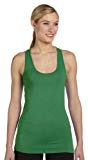

Product Title:  alo sport ladies bamboo racerback tank w2006leafslatexl 
productbrand alo
productcolor leaf/slate
Euclidean Distance from input image: 0.003125
Amazon Url: www.amzon.com/dp/B0023UNW7I


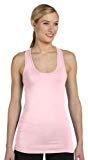

Product Title:  alo sport ladies bamboo racerback tank pinkwhite xs 
productbrand alo
productcolor pink/white
Euclidean Distance from input image: 5.286930305891777
Amazon Url: www.amzon.com/dp/B004J8LKP8


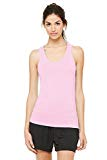

Product Title:  alo sport ladies bamboo racerback tank small pinkwhite 
productbrand alo sport
productcolor pink/white
Euclidean Distance from input image: 5.586850328553847
Amazon Url: www.amzon.com/dp/B0745GGJSB


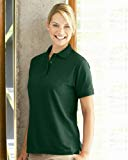

Product Title:  featherlite ladies pique sport shirt black small 
productbrand featherlite
productcolor black
Euclidean Distance from input image: 5.678128600120544
Amazon Url: www.amzon.com/dp/B003BSNUBO


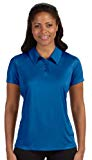

Product Title:  alo ladies performance threebutton polo shirt sport royal medium 
productbrand alo sport
productcolor sport royal
Euclidean Distance from input image: 5.678251748337986
Amazon Url: www.amzon.com/dp/B01GESYBOM


In [75]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
def get_similar_products(doc_id, num_results,weightofcolor,weightofbrand,weightoftitle,weightofimage):
    doc_id = asins.index(df_asins[doc_id])
    colordist = euclidean_distances(colorfeatures,colorfeatures[doc_id].reshape(1,-1))
    branddist = euclidean_distances(brandfeatures,brandfeatures[doc_id].reshape(1,-1))
    imagedist = euclidean_distances(bottleneck_features_train,bottleneck_features_train[doc_id].reshape(1,-1))
    titledist = euclidean_distances(word2vectitle,word2vectitle[doc_id].reshape(1,-1))
    euclidean_dist   = ((weightofcolor*colordist)+ (weightofbrand *branddist)+(weightoftitle *titledist)+(weightofimage *imagedist))/float(weightofcolor+weightofbrand+weightofimage+weightoftitle)

    indices = np.argsort(euclidean_dist.flatten())[0:num_results]
    pdists  = np.sort(euclidean_dist.flatten())[0:num_results]

    for i in range(len(indices)):
        rows = newdata[['medium_image_url','title','brand','color']].loc[newdata['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            print('productbrand',row['brand'])
            print('productcolor',row['color'])
            print('Euclidean Distance from input image:', pdists[i])
            print('Amazon Url: www.amzon.com/dp/'+ asins[indices[i]])

get_similar_products(500,5,4,3,2,1)

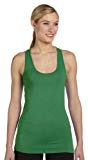

Product Title:  alo sport ladies bamboo racerback tank w2006leafslatexl 
productbrand alo
productcolor leaf/slate
Euclidean Distance from input image: 0.013671875
Amazon Url: www.amzon.com/dp/B0023UNW7I


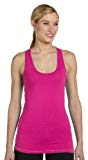

Product Title:  alo sport ladies racerback bamboo tank 
productbrand alo
productcolor berry/white
Euclidean Distance from input image: 11.846799945921642
Amazon Url: www.amzon.com/dp/B003IWOLYS


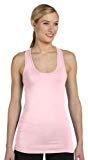

Product Title:  alo sport ladies bamboo racerback tank pinkwhite xs 
productbrand alo
productcolor pink/white
Euclidean Distance from input image: 13.06433314819163
Amazon Url: www.amzon.com/dp/B004J8LKP8


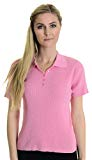

Product Title:  sag harbor womens short sleeve ribbed polo shirt ballet pink small 
productbrand sag harbor
productcolor ballet pink
Euclidean Distance from input image: 19.463813908719384
Amazon Url: www.amzon.com/dp/B071CZMDB4


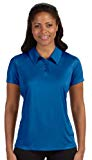

Product Title:  alo ladies performance threebutton polo shirt sport royal medium 
productbrand alo sport
productcolor sport royal
Euclidean Distance from input image: 19.902557647318584
Amazon Url: www.amzon.com/dp/B01GESYBOM


In [76]:
get_similar_products(500,5,1,3,5,7)

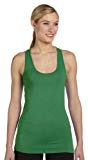

Product Title:  alo sport ladies bamboo racerback tank w2006leafslatexl 
productbrand alo
productcolor leaf/slate
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B0023UNW7I


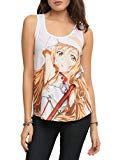

Product Title:  sword art online asuna sublimation girls tank top 2xl size xxlarge 
productbrand sword art online
productcolor white
Euclidean Distance from input image: 0.44496810839636014
Amazon Url: www.amzon.com/dp/B00TF6TS2G


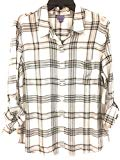

Product Title:  laura scott womens shirt shimmers size large 
productbrand laura scott
productcolor plaid black/white
Euclidean Distance from input image: 0.45252822246216623
Amazon Url: www.amzon.com/dp/B0742K78DD


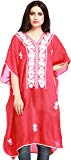

Product Title:  exotic india virtualpink ari embroidered short kaftan kashmir 
productbrand exotic india
productcolor pink
Euclidean Distance from input image: 0.45278464164398996
Amazon Url: www.amzon.com/dp/B06WD4VHLZ


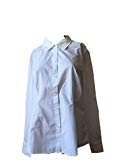

Product Title:  boden white button blouse top shirt size 10 
productbrand boden
productcolor white
Euclidean Distance from input image: 0.45278464164398996
Amazon Url: www.amzon.com/dp/B0716DXRHZ


In [77]:
get_similar_products(500,5,0,1,5,0)

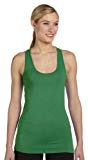

Product Title:  alo sport ladies bamboo racerback tank w2006leafslatexl 
productbrand alo
productcolor leaf/slate
Euclidean Distance from input image: 0.026041666666666668
Amazon Url: www.amzon.com/dp/B0023UNW7I


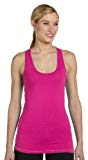

Product Title:  alo sport ladies racerback bamboo tank 
productbrand alo
productcolor berry/white
Euclidean Distance from input image: 12.336870575011401
Amazon Url: www.amzon.com/dp/B003IWOLYS


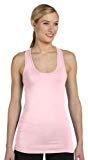

Product Title:  alo sport ladies bamboo racerback tank pinkwhite xs 
productbrand alo
productcolor pink/white
Euclidean Distance from input image: 18.321678623771245
Amazon Url: www.amzon.com/dp/B004J8LKP8


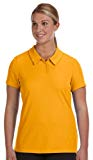

Product Title:  alo ladies junior fit performance mesh polo shirt w1709 large sport athletic gold 
productbrand all sport
productcolor sport ath gold
Euclidean Distance from input image: 31.86170438378252
Amazon Url: www.amzon.com/dp/B00PH3DJC6


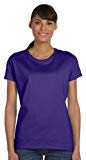

Product Title:  fruit loom ladies 100 heavy cotton hd tshirt xl purple 
productbrand fruit of the loom
productcolor purple
Euclidean Distance from input image: 32.67892883739429
Amazon Url: www.amzon.com/dp/B014WBV6E6


In [78]:
get_similar_products(500,5,0,1,0,5)

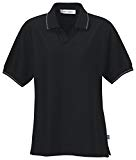

Product Title:  ladies mini ottoman polo shirt 3x black w black desert sand pewter 
productbrand ash city
productcolor black 703
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B002KG208W


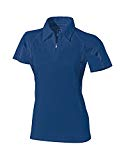

Product Title:  womens athletics double dry polo apparel 
productbrand champion
productcolor athletic royal
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B003BSUMYC


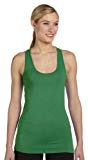

Product Title:  alo sport ladies bamboo racerback tank w2006leafslatexl 
productbrand alo
productcolor leaf/slate
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B0023UNW7I


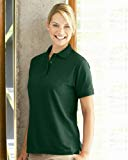

Product Title:  featherlite ladies pique sport shirt black small 
productbrand featherlite
productcolor black
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B003BSNUBO


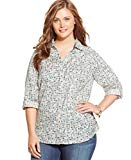

Product Title:  style co plus size masonjarprint shirt 0x 
productbrand club room
productcolor navy blue
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B004DFJIAQ


In [79]:
get_similar_products(500,5,5,1,0,0)

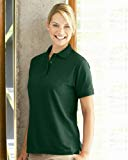

Product Title:  featherlite ladies pique sport shirt black small 
productbrand featherlite
productcolor black
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B003BSNUBO


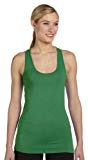

Product Title:  alo sport ladies bamboo racerback tank w2006leafslatexl 
productbrand alo
productcolor leaf/slate
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B0023UNW7I


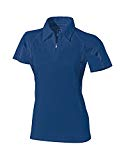

Product Title:  womens athletics double dry polo apparel 
productbrand champion
productcolor athletic royal
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B003BSUMYC


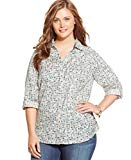

Product Title:  style co plus size masonjarprint shirt 0x 
productbrand club room
productcolor navy blue
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B004DFJIAQ


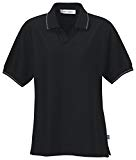

Product Title:  ladies mini ottoman polo shirt 3x black w black desert sand pewter 
productbrand ash city
productcolor black 703
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B002KG208W


In [80]:
get_similar_products(500,5,0,5,0,0)

## DOCUMENTATION CONCLUSIONS AND KEYTAKEAWAYS
### WE HAVE CONSIDERD THE FATURES AND PERFORMED THE EXPLORATORY DATA ANALYSIS OVER THE FEATURES AND CONSIDERD THE DATA WHERE LENGHT OF STRING OF THE TILE FEATURES IS GREATER THAN 4.
### WE HAVE DONE THE DATA PREPROCESSING AND REMOVED THE DUPLICATED DATA.
### WE WROTE THE UTITLITY FUNCTIONS CONSIDERING THE REQUIREMENT TO DISPLAY THE PRODUCT AND VECTOR IN THE FORM OF HEATMAP.
### THIS VISUALISTATION HELPS US HOW THE PRODUCT IS RECCOMENDED TO OTHER PRODUCT.
### WE HAVE DONE THE FEATURE EXTRACTION NOW WE GONNA ENCODE THE FEATURES BEFORE WE DEPLOY THEM INTO THE MODELS.



### WE HAVE ENCODED THE TITLE VECTORS USING THE ONE HOT ENCODING AND VISUALISED THE PRODUCTS BASED ON THE DISTANCES THAT ARE NEAR USING THE COSINE SIMILARITY. WE WILL TAKE THE QUERY PRODUCT AND COMPARE THE PRODUCT WITH OTHER PRODUCTS BASED ON THE VALUE OF COSINE SIMILARITY AND DISPALYED THE TOP PRODUCTS THAT ARE RECOMMENDED.
### WE HAVE DONE SIMILAR THING WITH THE TFIDF VECTORIZER AND RECCOMENDED THE PRODUCTS THAT ARE SIMILAT TO THE QUERY PRODUCT.
### IN THE SCIKIT LEARN WE DONT HAVE THE DIRECT FUNCTION TO ENCODRE THE FEATURES USING THE IDF SO WE WROTE THE FUNCTION AND EXTRACTED THE IDF VALUES AND RECOMENDE BASED ON THE COSINE SIMILARITY

###LATER WE HAVE RECOMMENDE THE FEATURES WITH AVERAGE WORD2VEC AND TFIDF WORD2VEC I TRIED TO TRAIN MY OWN WORD2VEC MODEL BUT THE PERFORMANCE OF THE MODEL WAS NOT GOOD WHICH IS THE IMPORTANT KEYTAKEAWAY. SO I9HAVE USED ALREADY GENERATED PICKLE FILE AND USED THE VECTORS AND RECOMMENDED THE PRODUCTS FOR AVERAGE WORD2VEC AND TFIDF WORD2VEC.


### WE HAVE ALSO GENERATED THE FEATURES AND STACKED THE FEATURES BASED ON THE BRAND COLOR AND TITLE OF THE PRODUCT. BASED ON THE WEIGHTS PROVIDED WE OBTAINED THE RECOMMENDED PRODUCTS


### WE HAVE USED DEEP LEARNONG METHODS ALSO CONVOLUTIONA NUERAL NETWORKS COMAPRING THE PERFORMANCES THE CONVOLUTIONAL NUERAL NETS PERFORMANCE WAS BETER HTAN THE ALL THE MODELS WHERE THE PRODUCT LOOKS MORE SIMILAR .
###RATING THE PERFORMANCES CONVOLUTIONAL LAYERS SPECIALLLY WE USED  VGG NET WHICH IS RESEARCHED AND NOTIFIED AS THE PROMISING PROCEDURE OF CONVOLUTION.
###TFIDF WORD2VEC AND WORD2V2EC COMPARISION ARE MORESIMILAR  THE KEYTAKE AWAY IS EVEN THE MODELS LIKE COUNTVECTORIZER ,TFIDF VECTORIZER,IDF VECTORIZER PERFORMED WELL IN RECCOMENDATAION.


##FOR THE TASKS OF THE ASSIGNMENT WE HAVE TAKEN IDF WORD2VEC FOR THE TEXT FEATURE
* ONE HOT ENCODED FEATURES FOR THE BRAND
* ONE HOT ENCODED FEATURES FOR THE COLOR
* IMAGE FEATURES FOR THE VGG 16.
WE HAVE USED THE ABOVE FEATURES THAT IN THE WEIGHTED FORMAT WE OSERVED AND PROVIDED WEIGHTS TO THE FEATURES AND OBTAINED THE RECCOMENDED PRODUCTS BASED ON THE WEIGHTS PROVIDED.
* we have used the euclidean distance based similarity
* WE HAVE VARIED FEATURES OF TEXT BRAND COLOR AND IMAGE FEATURES OF THE QUERY PRODUCTS AND OBTAINED THE RECCOMENDED PRODUCTS BASED ON THE BIASIG WE HAVE DONE